## Project Name: House prices : Advanced regression techniques
          The main aim of this project is to predict the house price based on various features which we will discuss as we go ahead


        1.Data analysis
        2.Feature engenering
        3.Model Building
        4.Model deployment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Data analysis phase ( understand more about the data)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## display all the colomns of the data frame
pd.pandas.set_option('display.max_columns',None)

In [2]:
dataset = pd.read_csv("train.csv")

In [3]:
print(dataset.shape)

(1460, 81)


In [4]:
dataset.head ()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]


            1.Missing values
            2.All the numerical variables
            3.distribution of the numerical variables
            4.categorical values
            5.cardinality of categorcal values
            6.outliers
            7.the relationship between dependent and independent variables

In [5]:
##Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values
for feature in features_with_na:
    print (feature , np.round(dataset[feature].isnull().mean(),4),'% missing values')

LotFrontage 0.1774 % missing values
Alley 0.9377 % missing values
MasVnrType 0.5973 % missing values
MasVnrArea 0.0055 % missing values
BsmtQual 0.0253 % missing values
BsmtCond 0.0253 % missing values
BsmtExposure 0.026 % missing values
BsmtFinType1 0.0253 % missing values
BsmtFinType2 0.026 % missing values
FireplaceQu 0.4726 % missing values
GarageType 0.0555 % missing values
GarageYrBlt 0.0555 % missing values
GarageFinish 0.0555 % missing values
GarageQual 0.0555 % missing values
GarageCond 0.0555 % missing values
PoolQC 0.9952 % missing values
Fence 0.8075 % missing values
MiscFeature 0.963 % missing values


## since there are many missing values we need to find out the relationship between the missing values and the sales price
           lets plot some diagram for this relationship

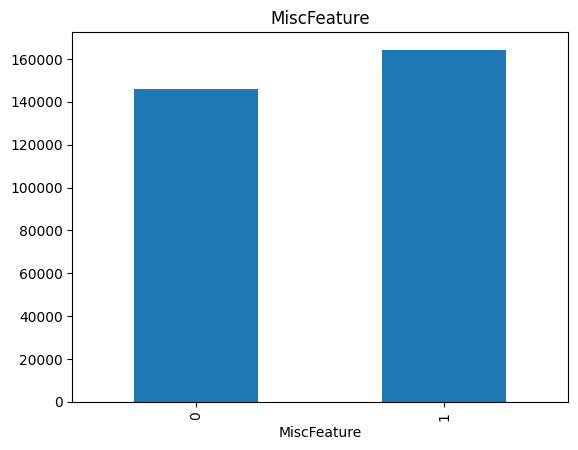

In [6]:
for feature in features_with_na:
    data = dataset.copy()
## lets make a variable that indicates 1 if the observation was missing or zero otherwise
data[feature]=np.where (data[feature].isnull(),1,0)
# lets calculate the mean sales price where the information is missing or present
data.groupby(feature)['SalePrice'].median().plot.bar()
plt.title(feature)
plt.show()

## ere With the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values with something meaningful which we will do in the Feature Engineering section

From the above dataset some of the features like Id is not required

In [7]:
print ("Id of Houses{}".format(len(dataset.Id)))

Id of Houses1460


## Numerical variables

In [8]:
# list of numercal variables
numerical_features = [feature for feature in dataset.columns if dataset [feature ].dtypes != 'o']
print ('Number of numerical variables', len(numerical_features))

# visualize the numerical variables
dataset[numerical_features].head()

Number of numerical variables 81


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

## Temporal variables
        From the Dataset we have 4 year variables. We have extracted information from the datetime variables like no of years or no of days. One example in this specific scenario can be difference in years between the year the house was built and the year the house was sold.

In [9]:
# list of variables that contains datetime variables
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [10]:
# lets explore the content of these year variables

for feature in year_feature :
    print( feature, dataset[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'House Price vs Year Sold')

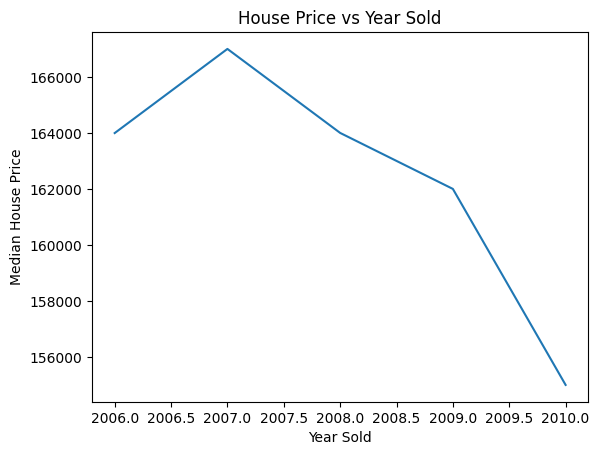

In [11]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price

dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title('House Price vs Year Sold')

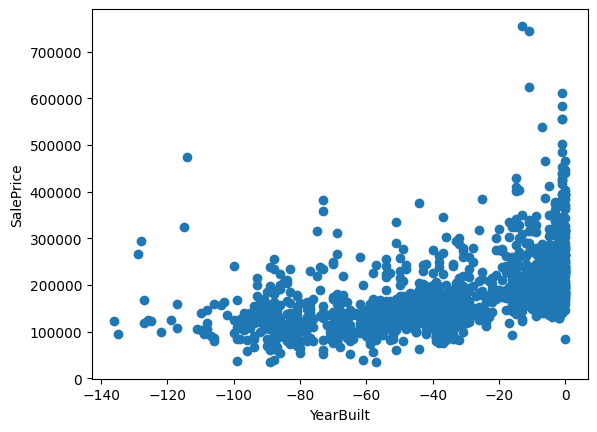

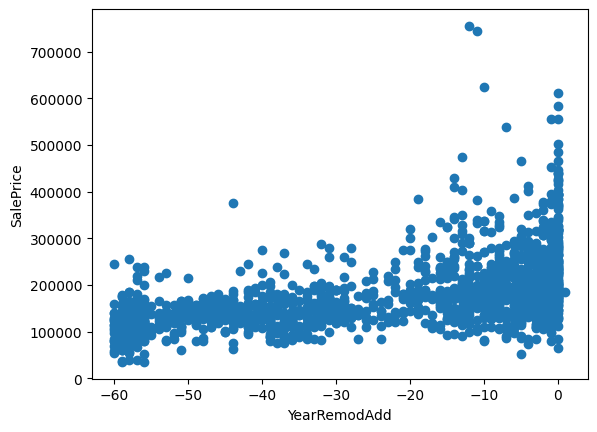

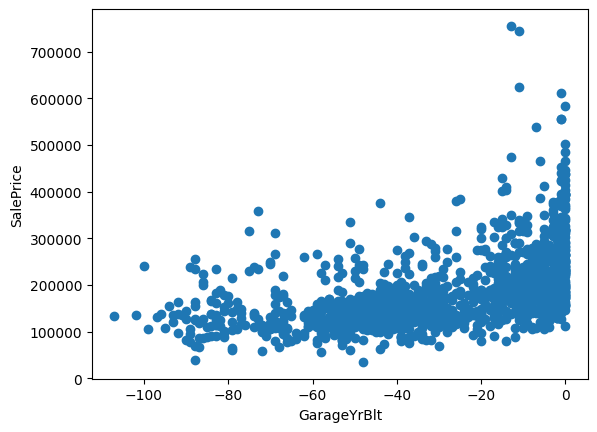

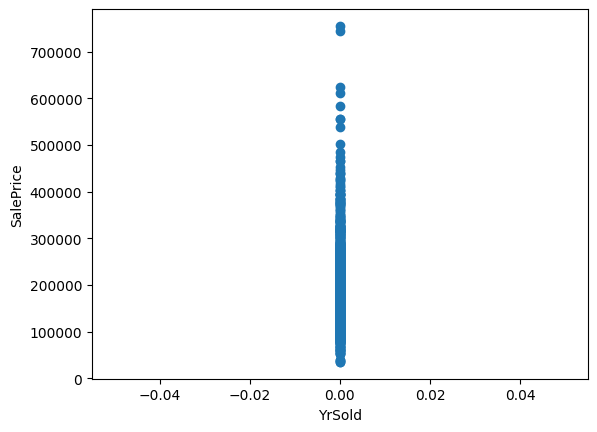

In [12]:
# here we will compare the diff between the all years features with sales price

for feature in year_feature:
    if feature != 'YrSold':
        daat = dataset.copy()
    # we will compare the diff between the year variable and year the house was sold for
    data[feature] = data[feature]-data['YrSold']
    plt.scatter(data[feature ],data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

In [13]:
# numerical variables are besically 2 types
# 1. Discrete variables and 2. continious variables

discrete_feature = [feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]
print(" Discrete Varaibles Count: {}".format(len(discrete_feature)))


 Discrete Varaibles Count: 59


In [14]:
discrete_feature

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 '3SsnPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'SaleType',
 'SaleCondition']

In [15]:
dataset[discrete_feature].head()

MSSubClass MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
0          60       RL   Pave   NaN      Reg         Lvl    AllPub    Inside   
1          20       RL   Pave   NaN      Reg         Lvl    AllPub       FR2   
2          60       RL   Pave   NaN      IR1         Lvl    AllPub    Inside   
3          70       RL   Pave   NaN      IR1         Lvl    AllPub    Corner   
4          60       RL   Pave   NaN      IR1         Lvl    AllPub       FR2   

  LandSlope Condition1  ... PavedDrive 3SsnPorch PoolArea  PoolQC  Fence  \
0       Gtl       Norm  ...          Y         0        0     NaN    NaN   
1       Gtl      Feedr  ...          Y         0        0     NaN    NaN   
2       Gtl       Norm  ...          Y         0        0     NaN    NaN   
3       Gtl       Norm  ...          Y         0        0     NaN    NaN   
4       Gtl       Norm  ...          Y         0        0     NaN    NaN   

  MiscFeature MiscVal MoSold SaleType SaleCondition  
0         NaN       0      2       WD        Normal  
1         NaN       0      5       WD        Normal  
2         NaN       0      9       WD        Normal  
3         NaN       0      2       WD       Abnorml  
4         NaN       0     12       WD        Normal  

[5 rows x 59 columns]

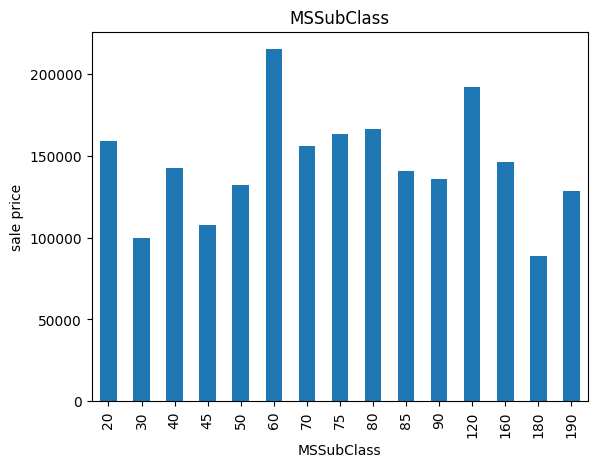

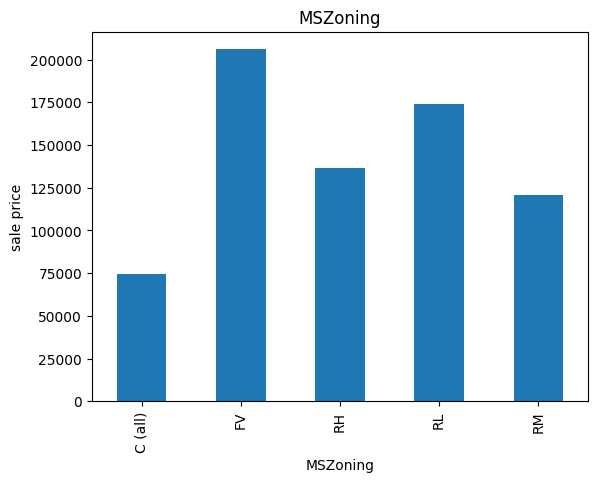

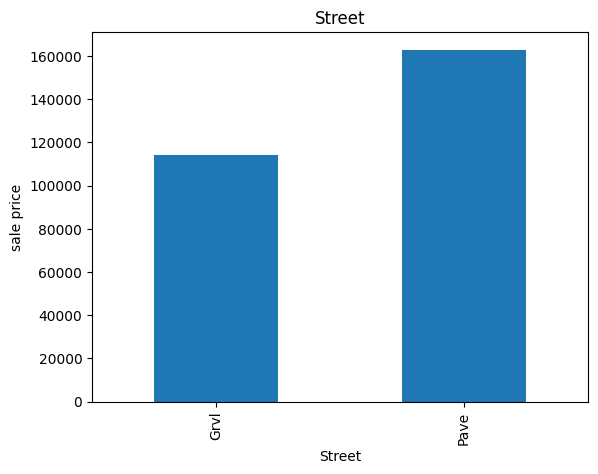

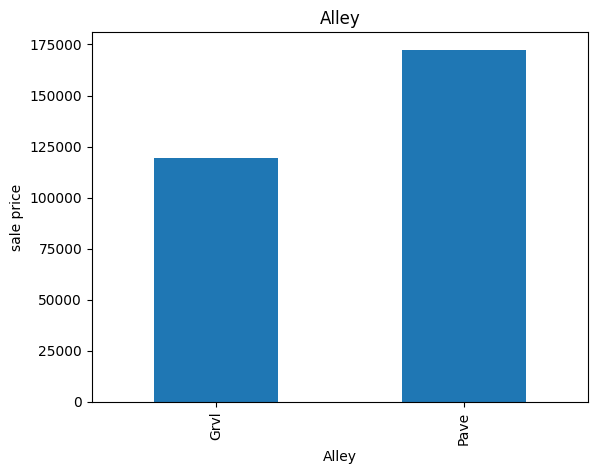

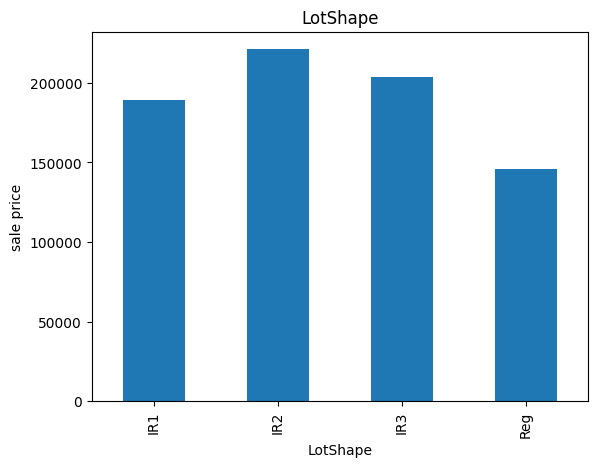

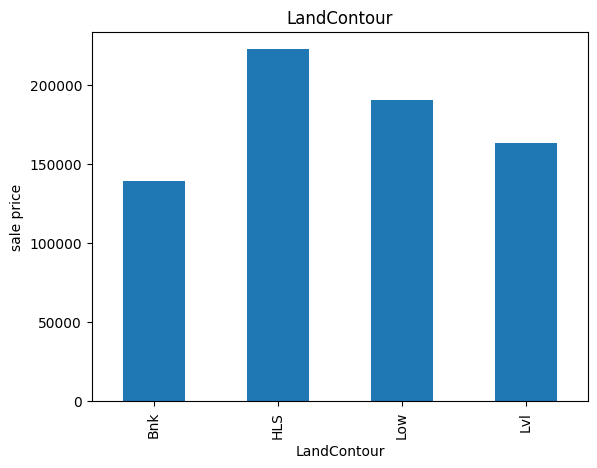

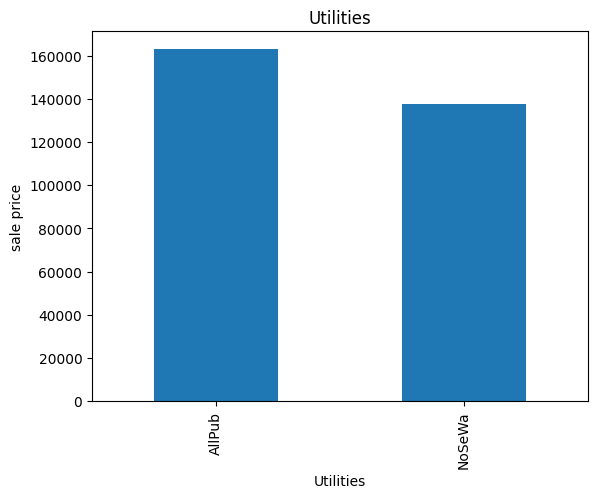

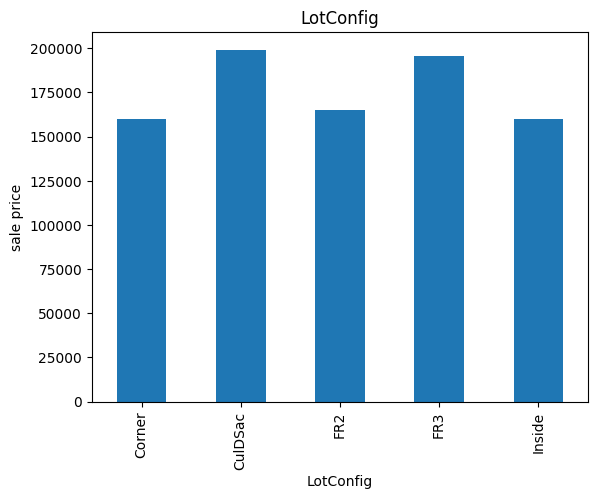

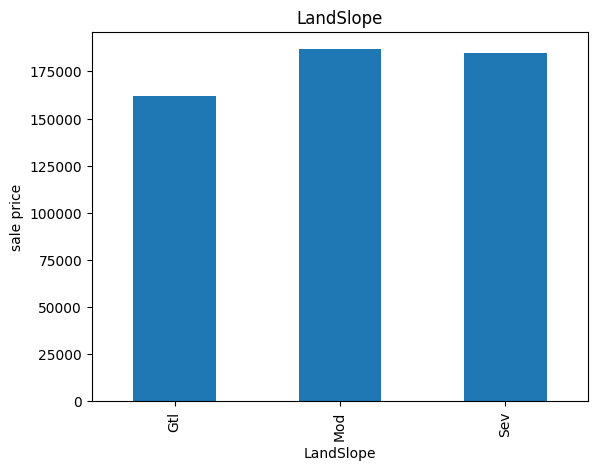

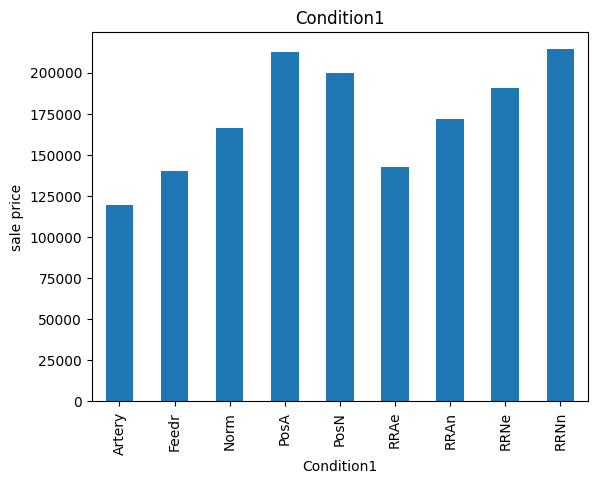

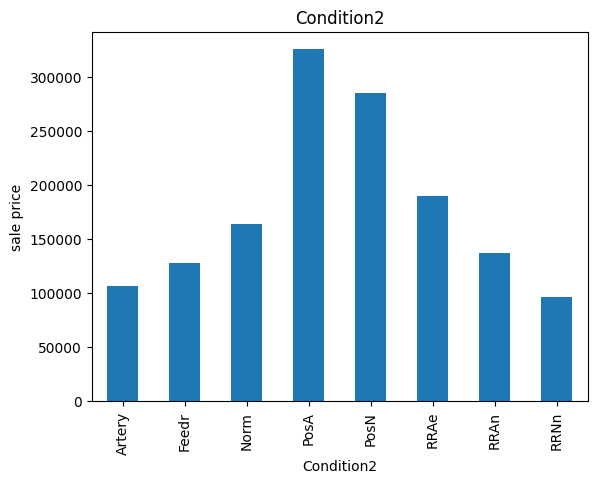

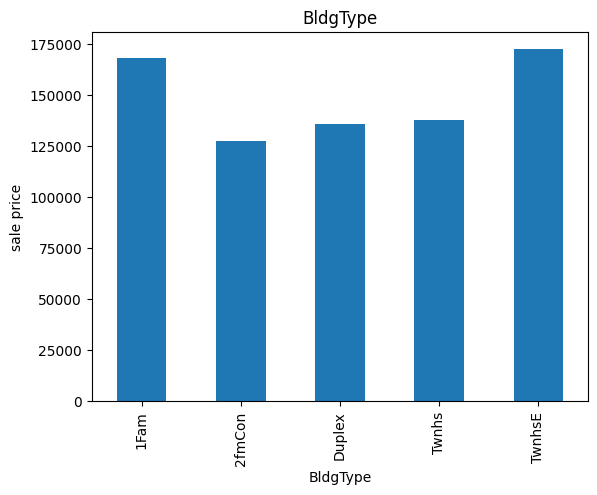

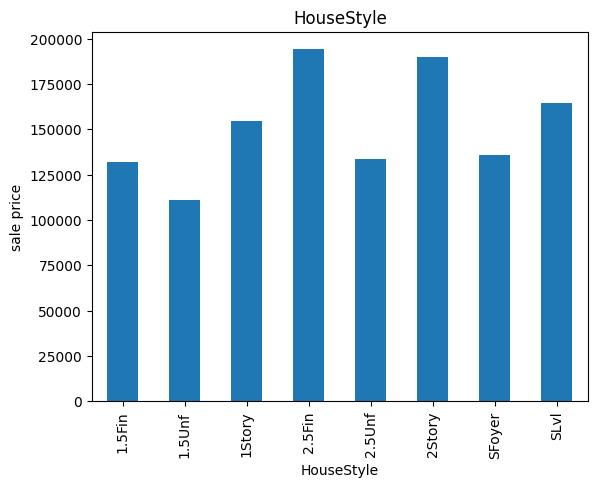

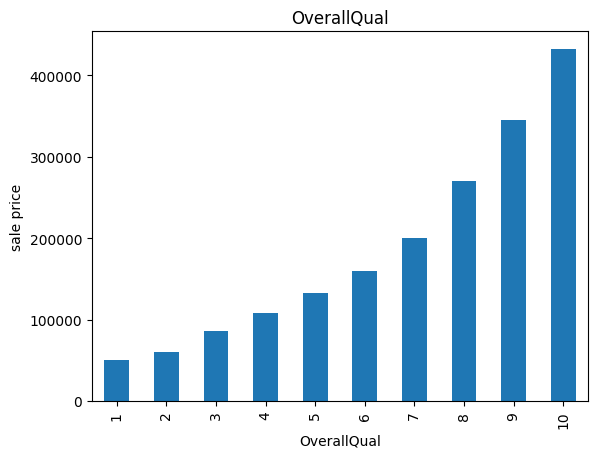

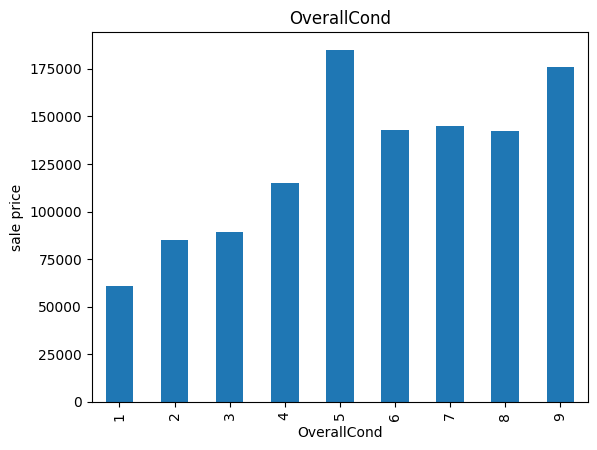

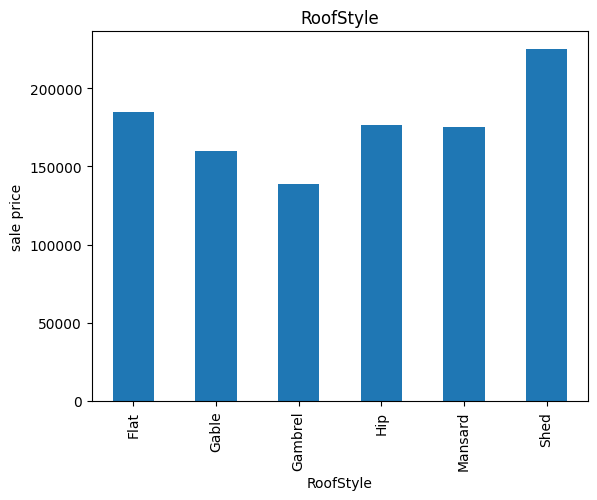

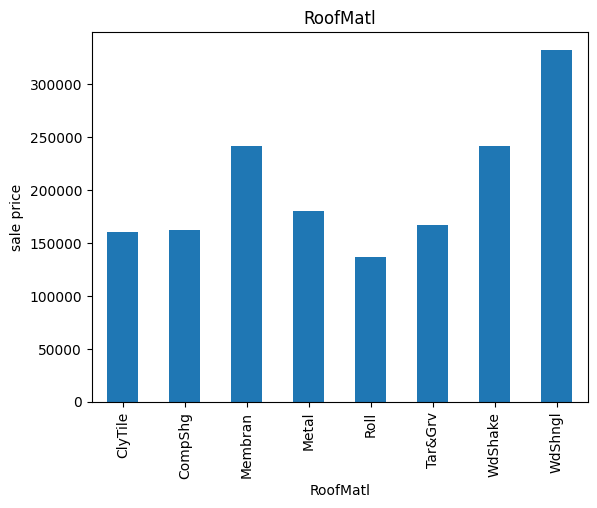

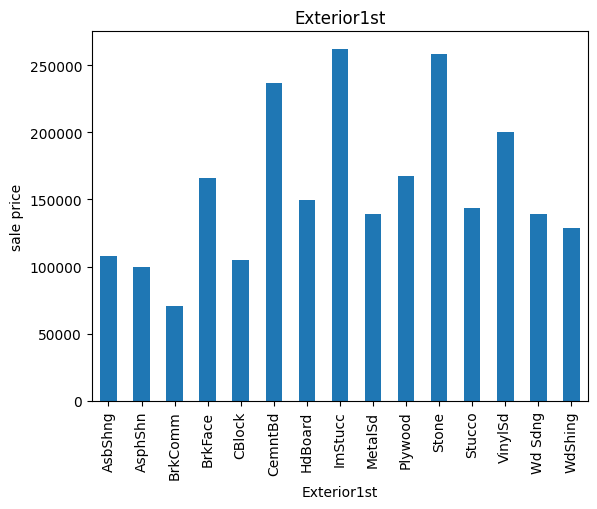

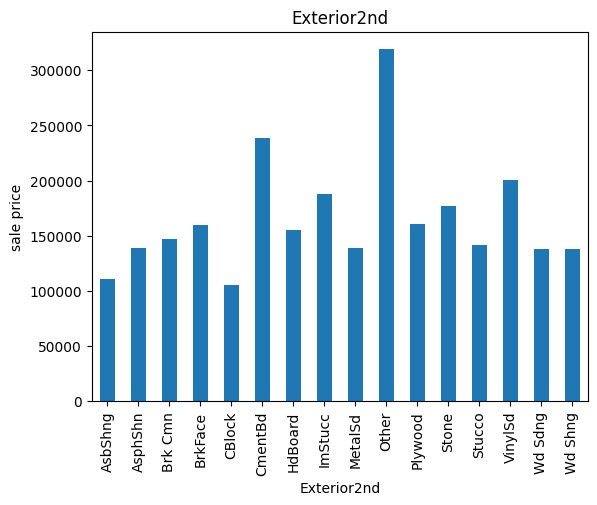

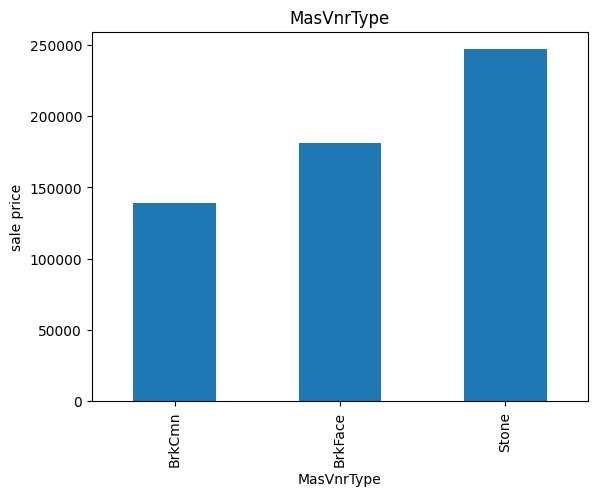

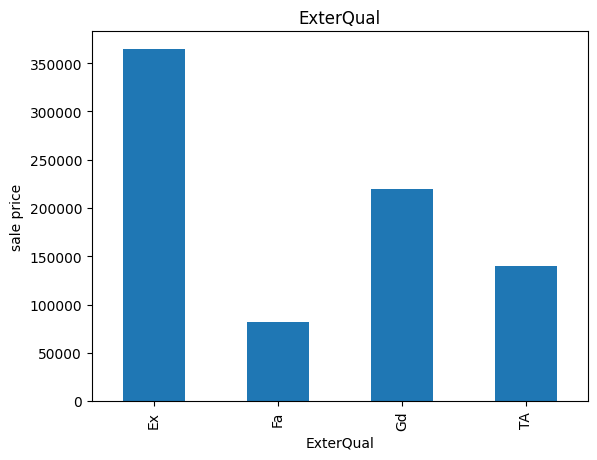

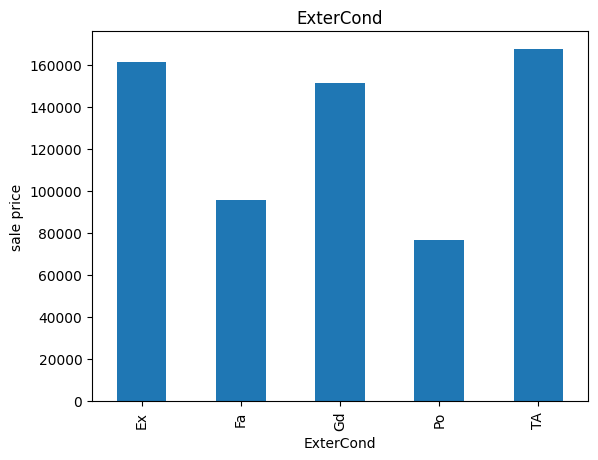

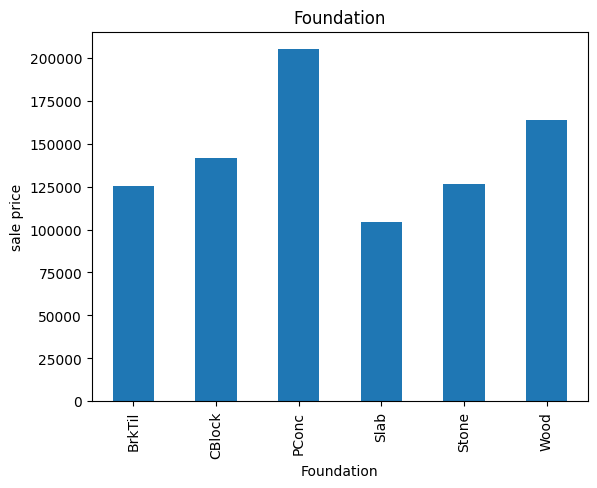

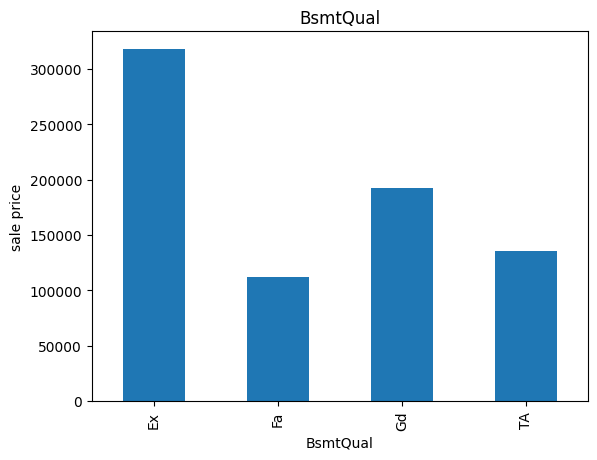

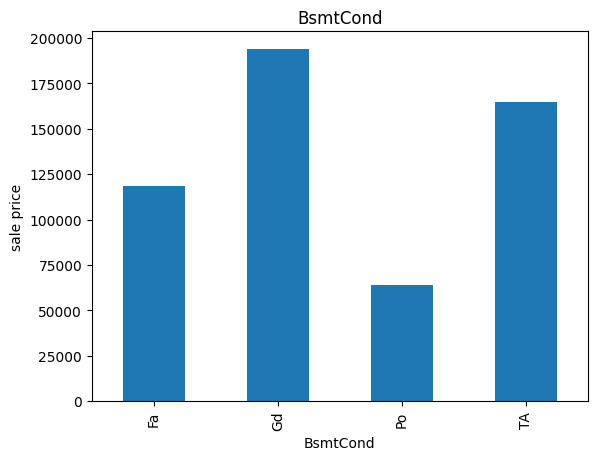

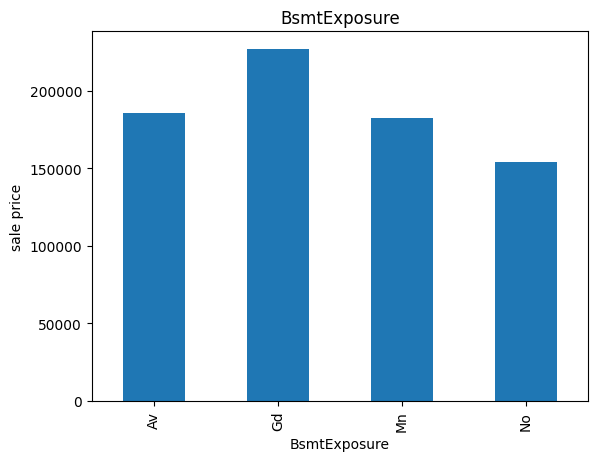

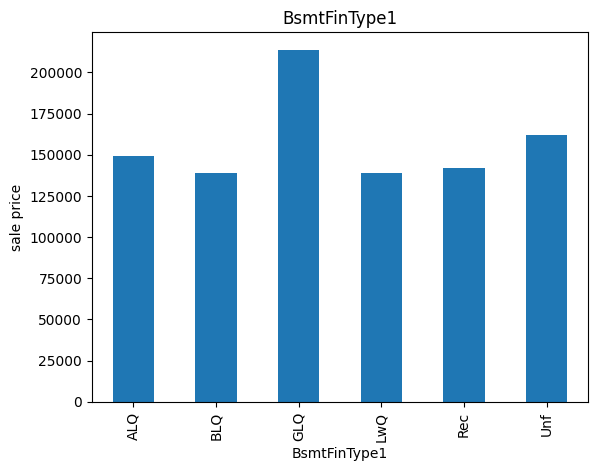

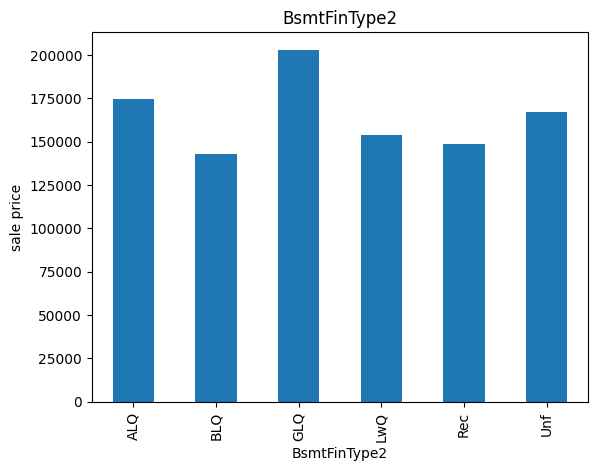

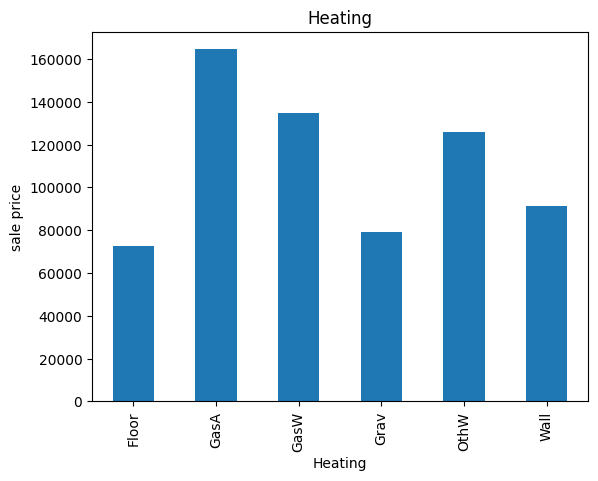

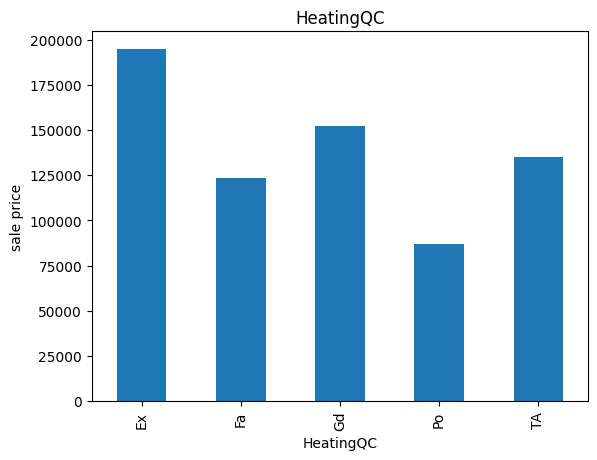

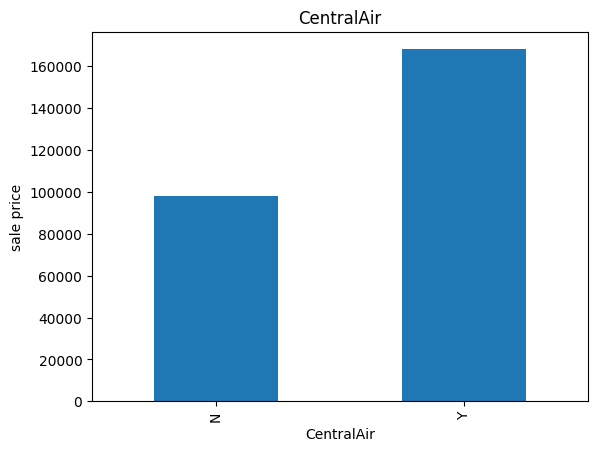

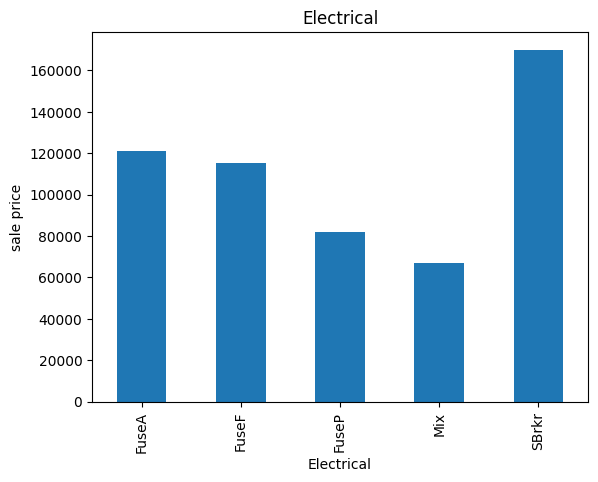

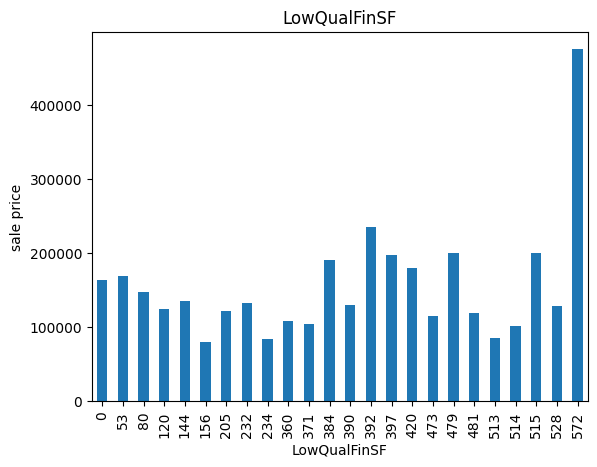

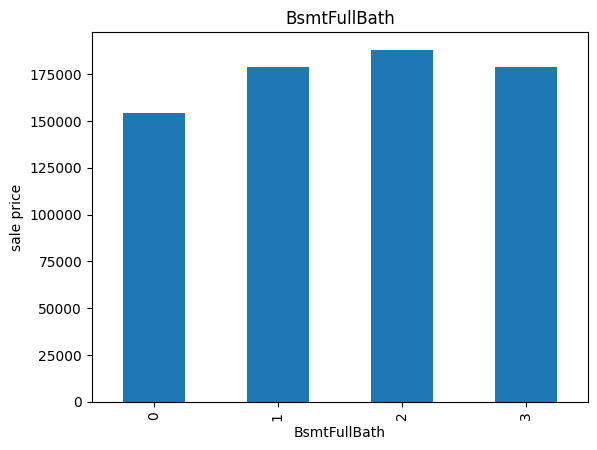

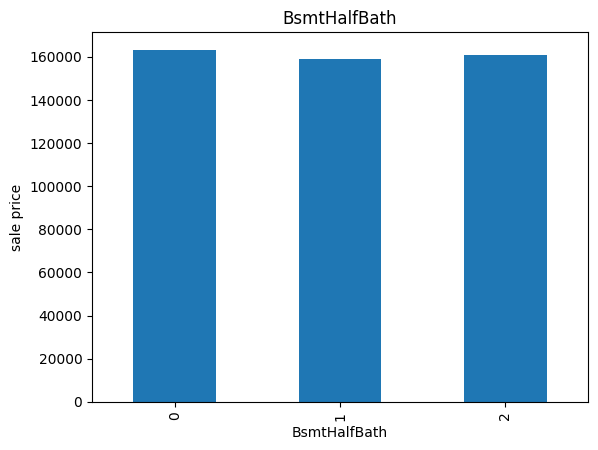

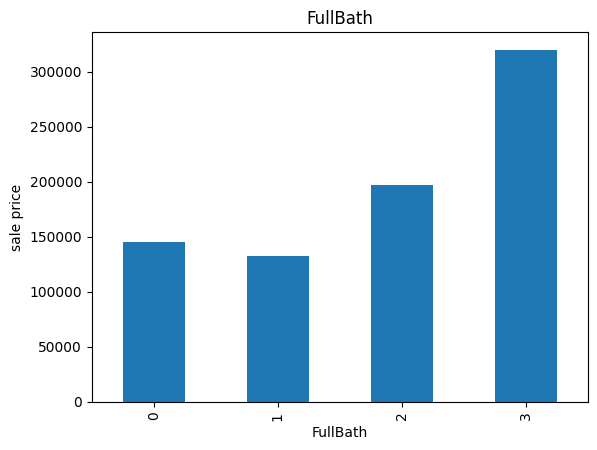

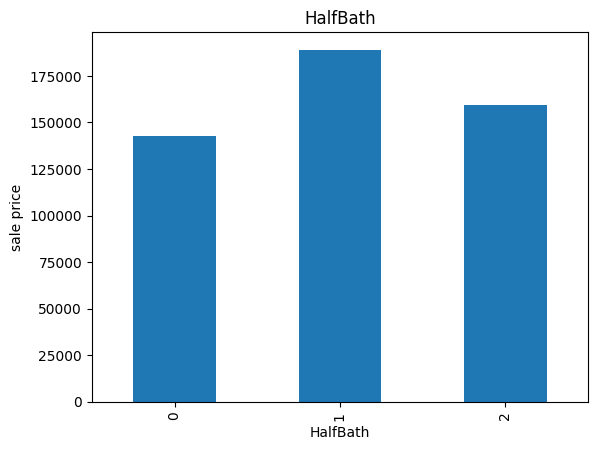

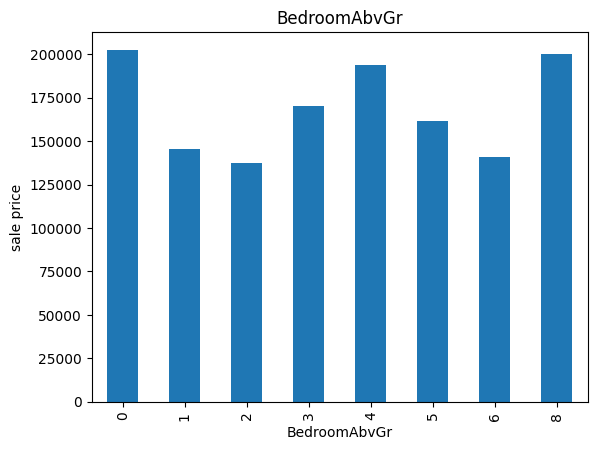

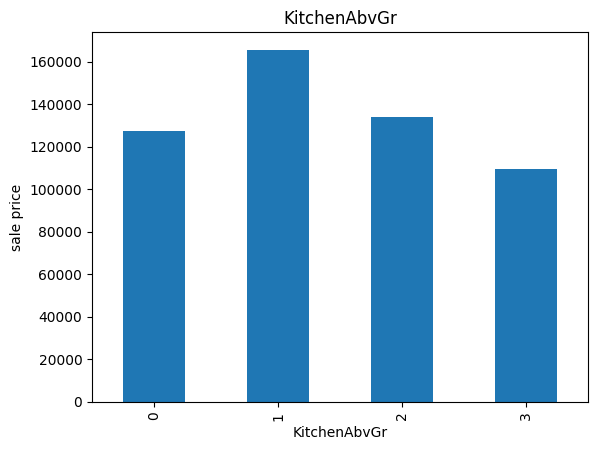

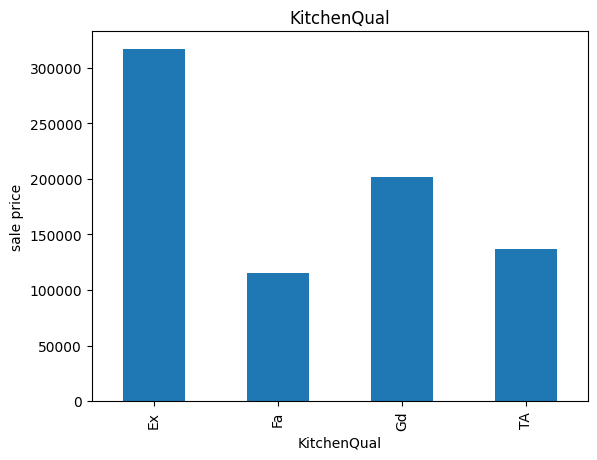

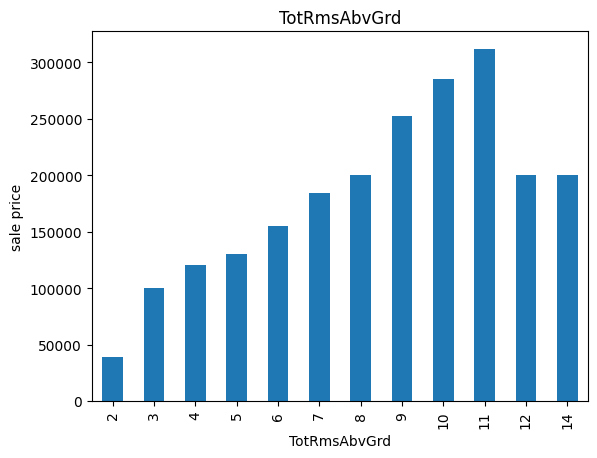

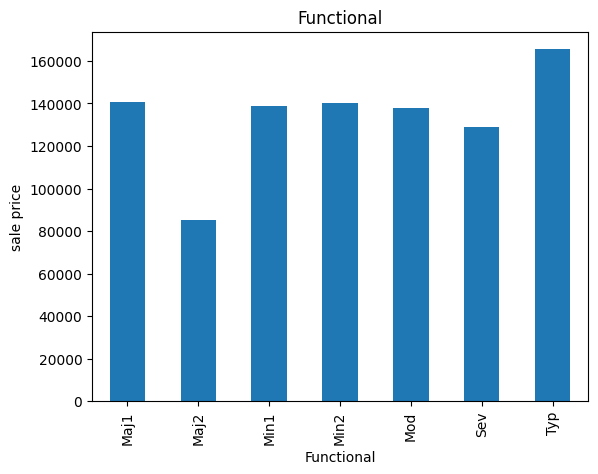

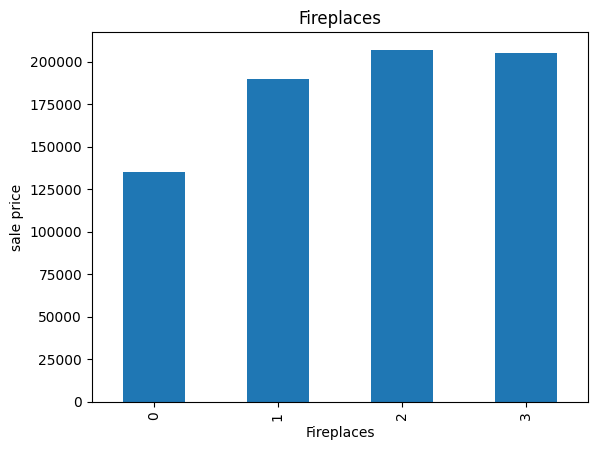

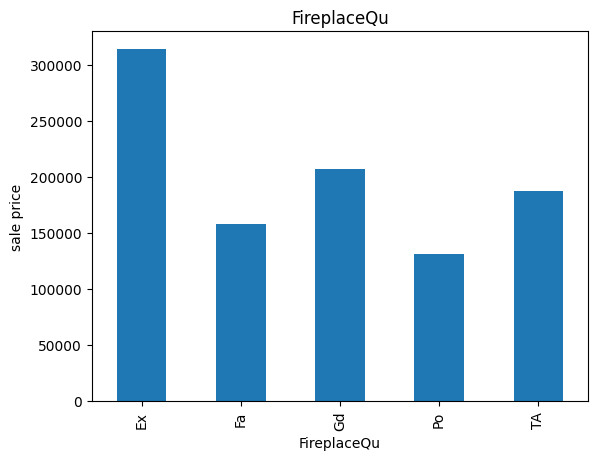

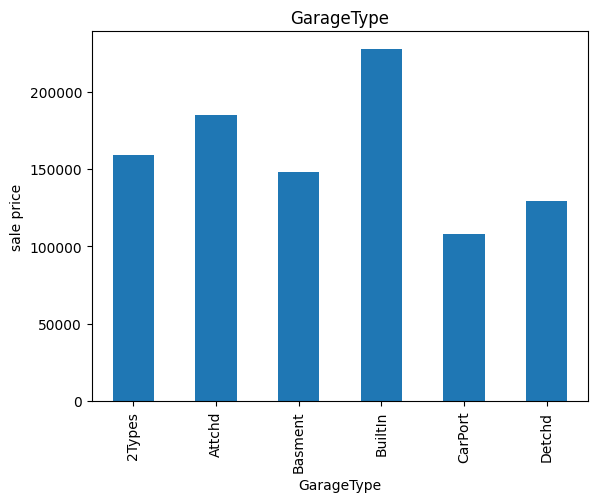

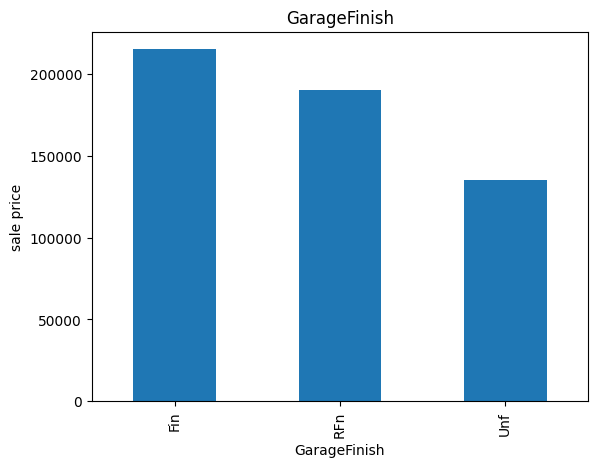

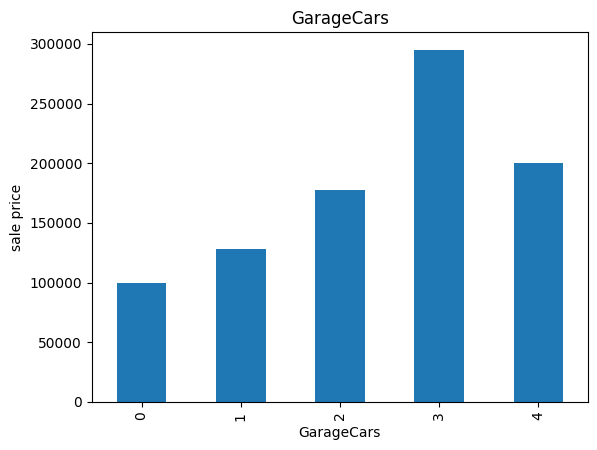

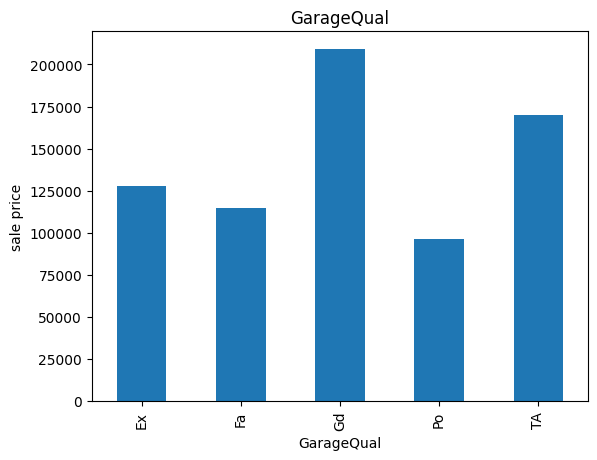

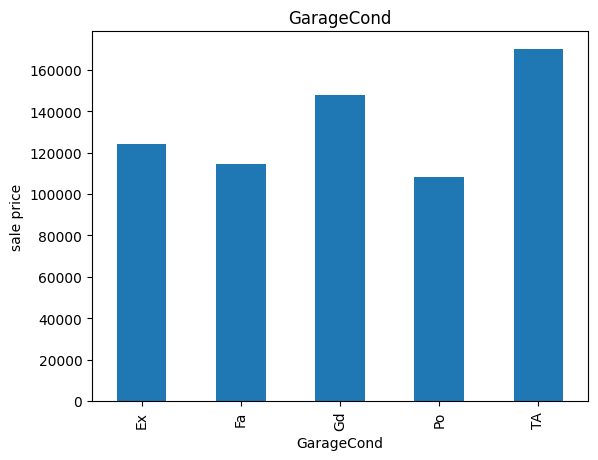

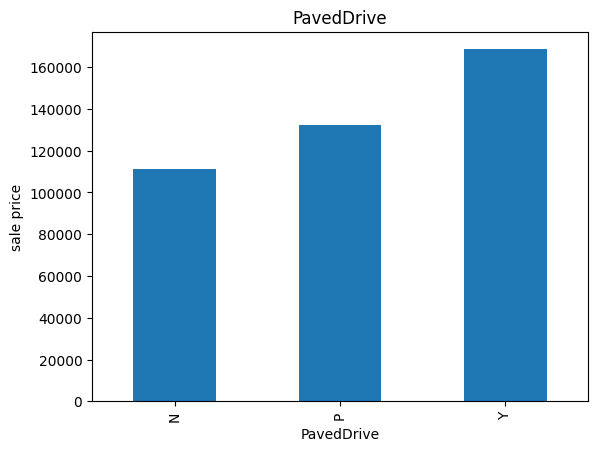

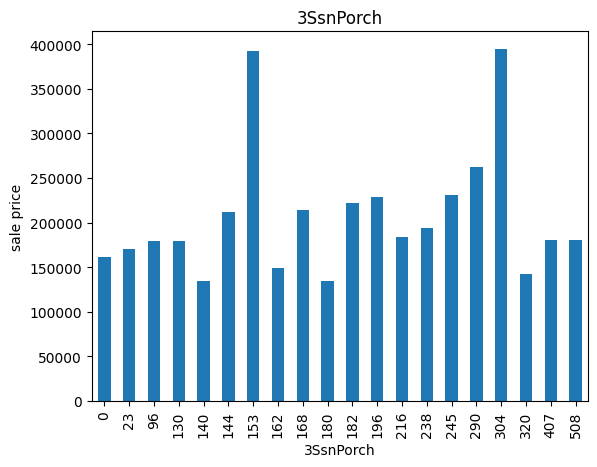

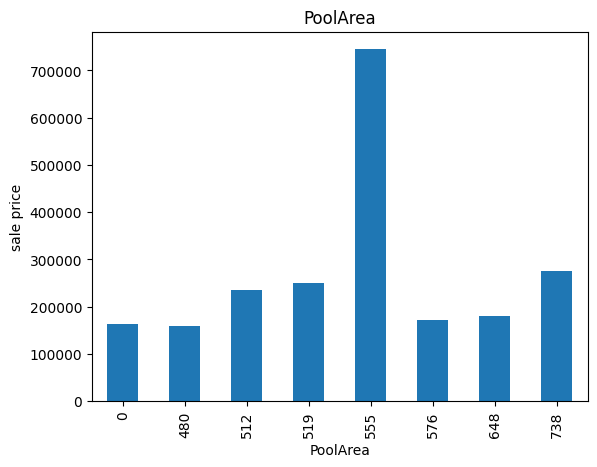

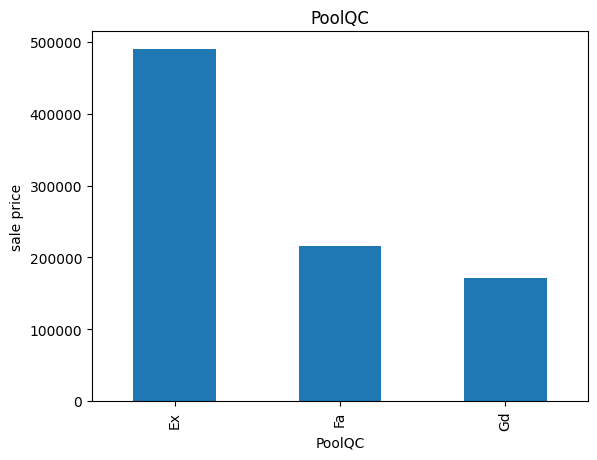

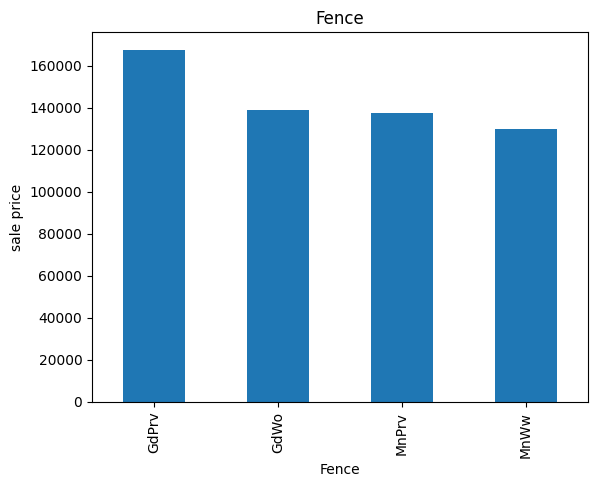

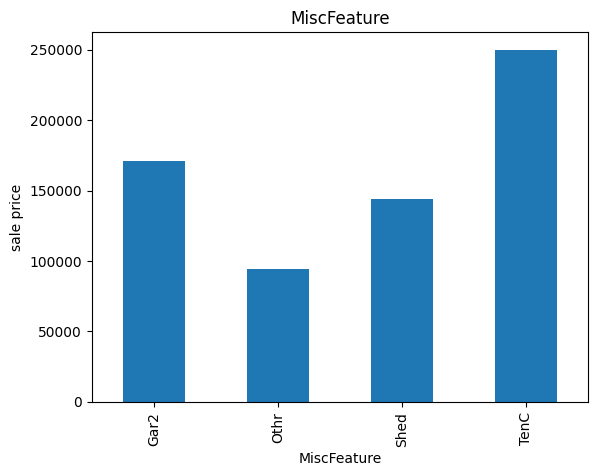

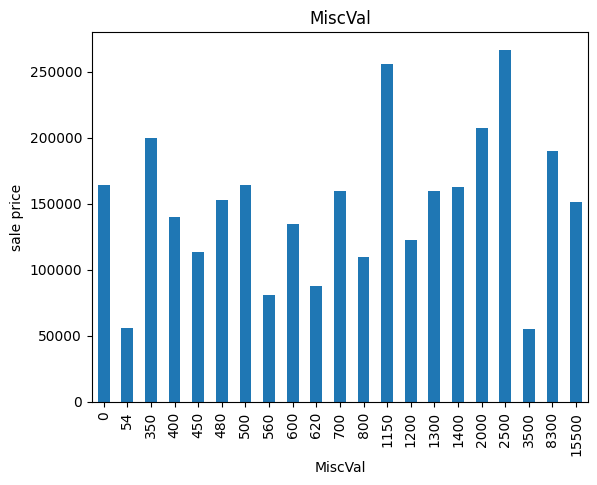

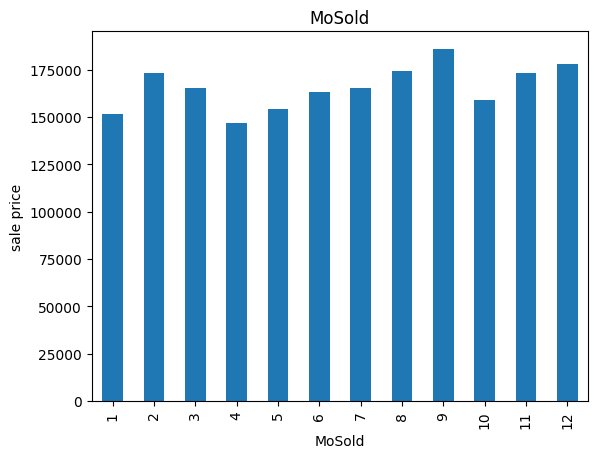

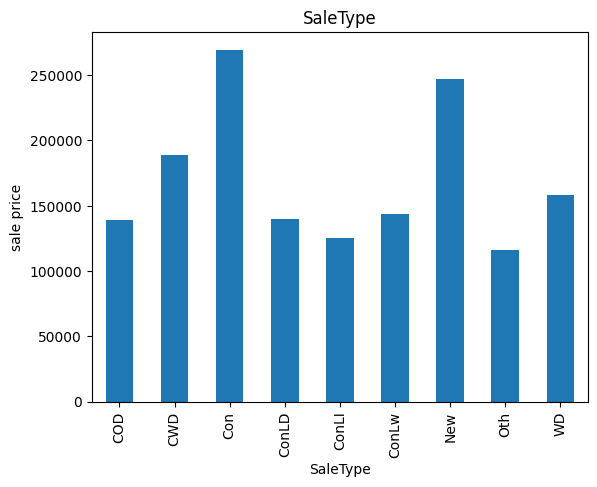

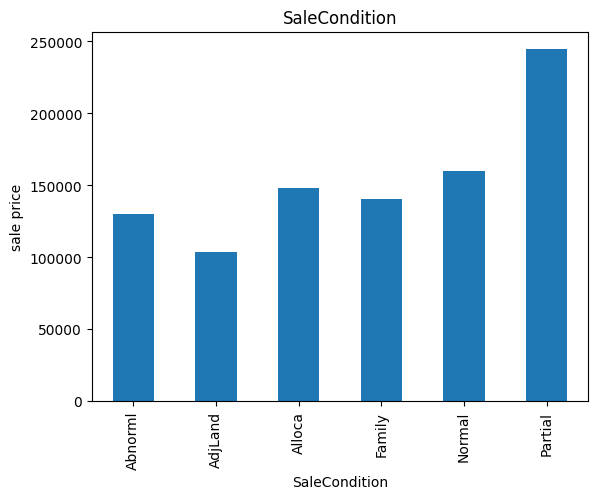

In [16]:
## lets find the relationship berween them and the sale price

for feature in discrete_feature:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('sale price')
    plt.title(feature)
    plt.show()

## Continious Variable

In [17]:
continuous_feature = [ feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print('Continuous feature Count {}'.format(len(continuous_feature)))

Continuous feature Count 17


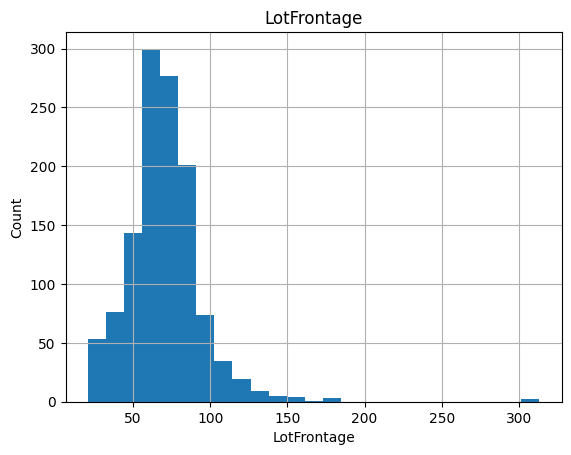

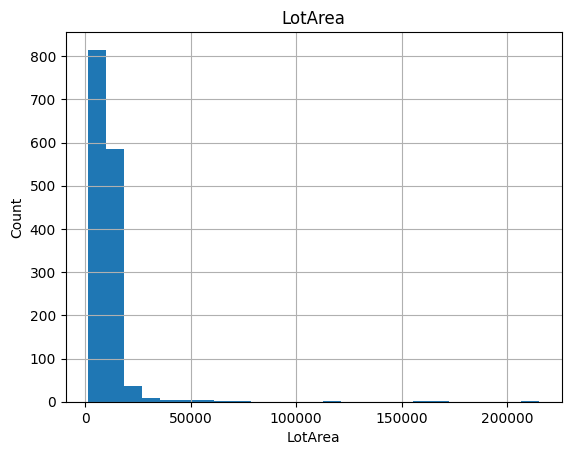

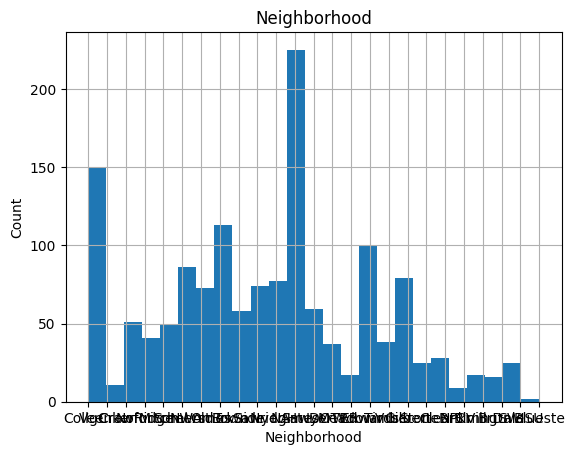

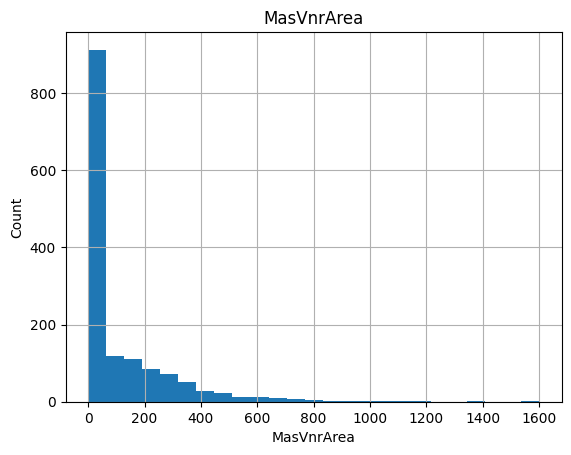

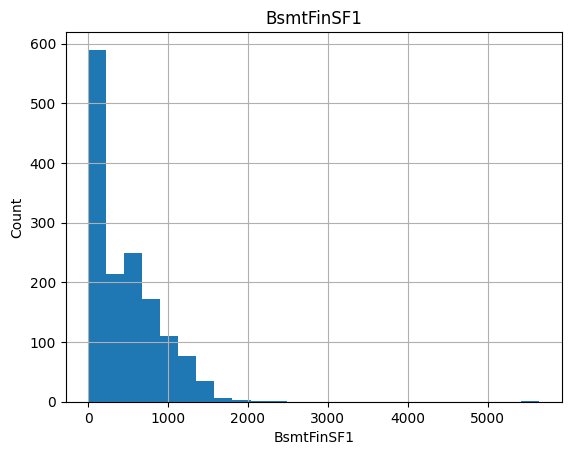

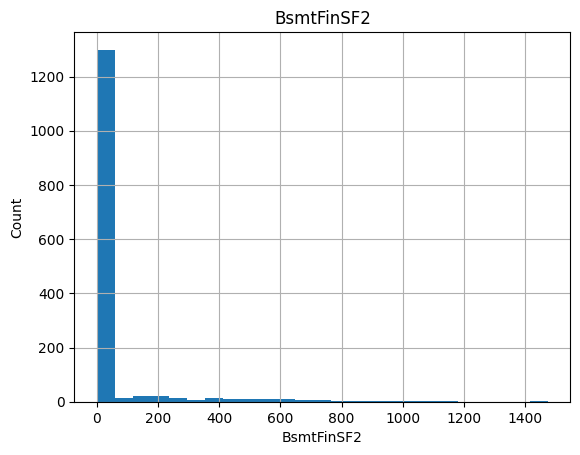

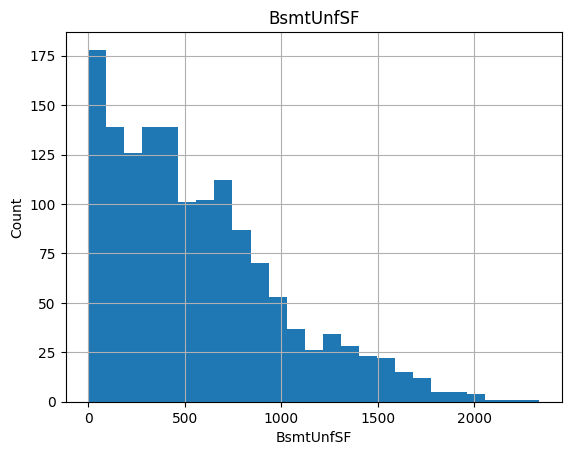

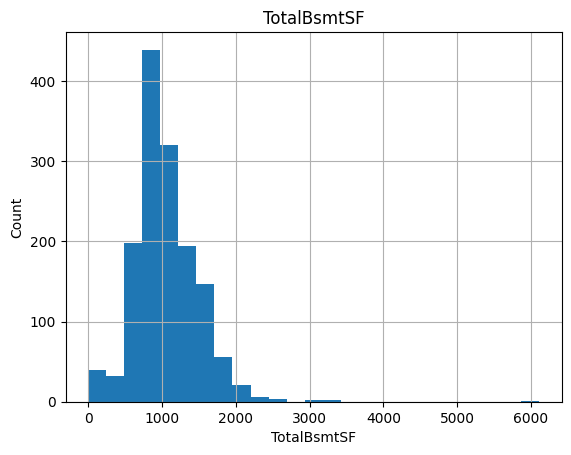

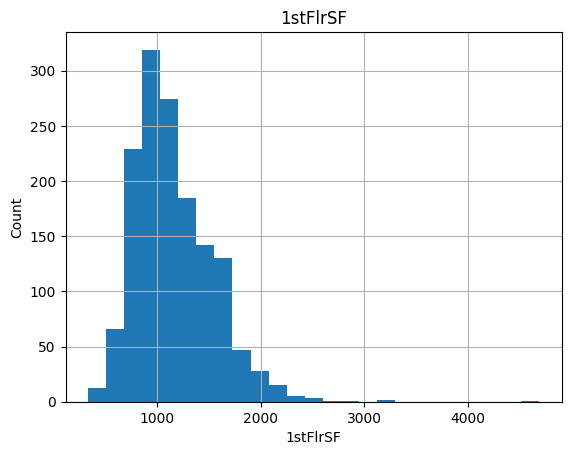

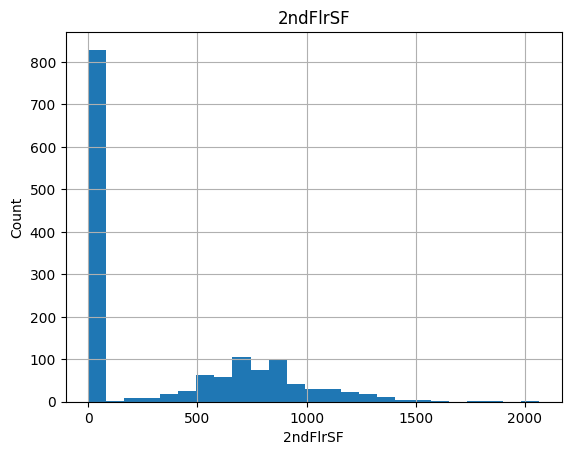

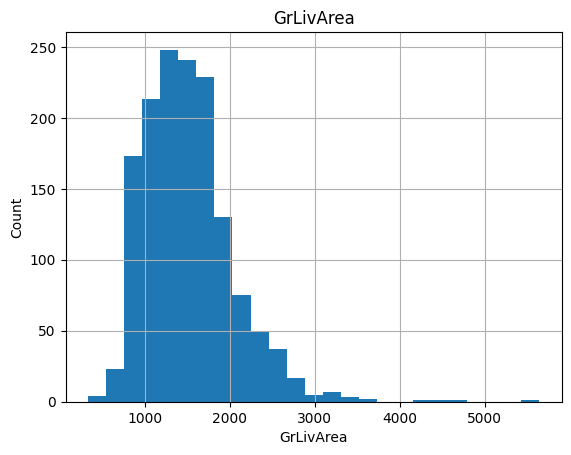

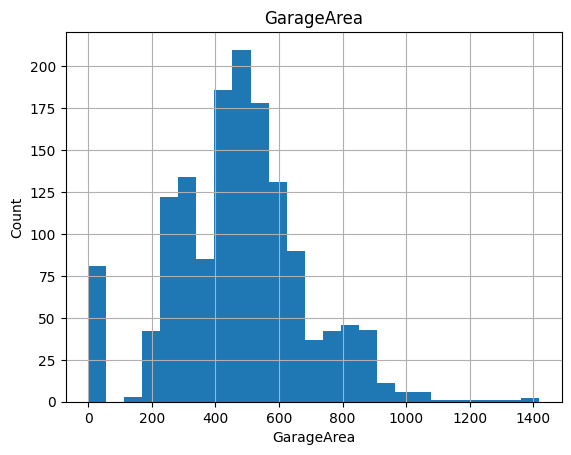

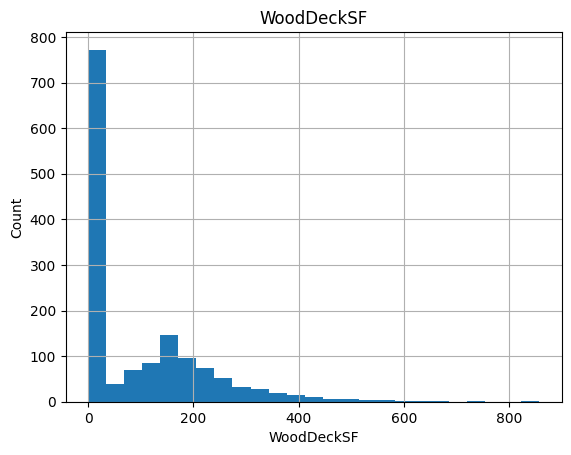

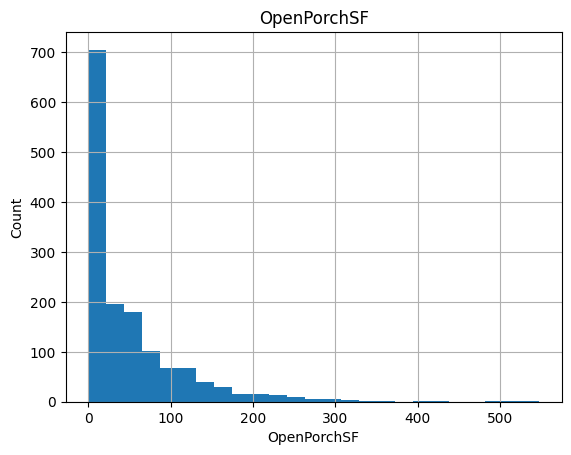

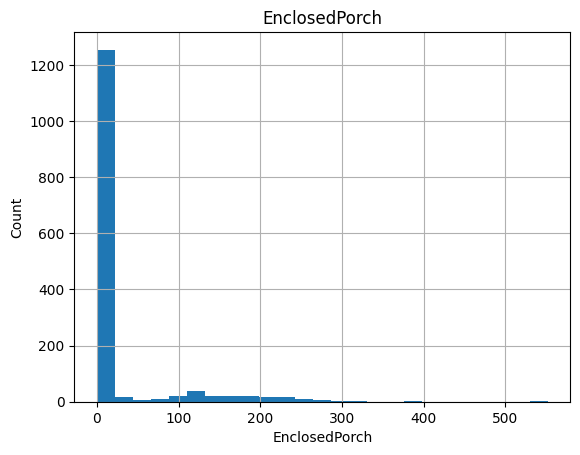

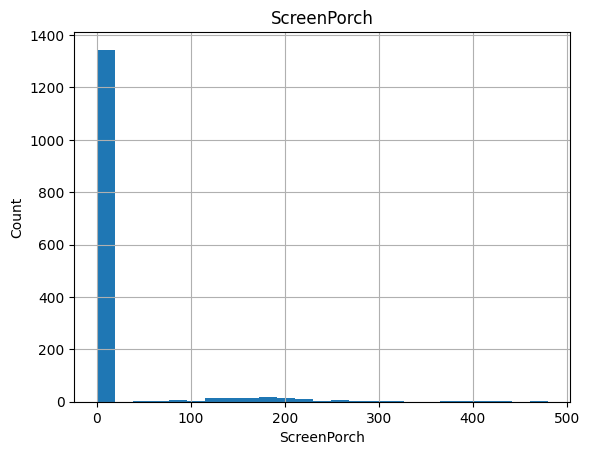

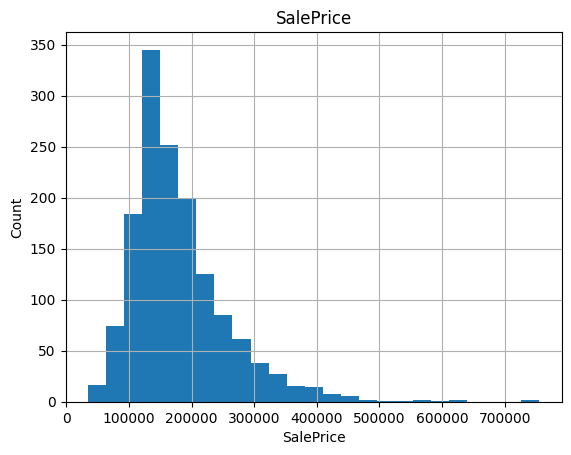

In [18]:
## let's understand the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data = dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

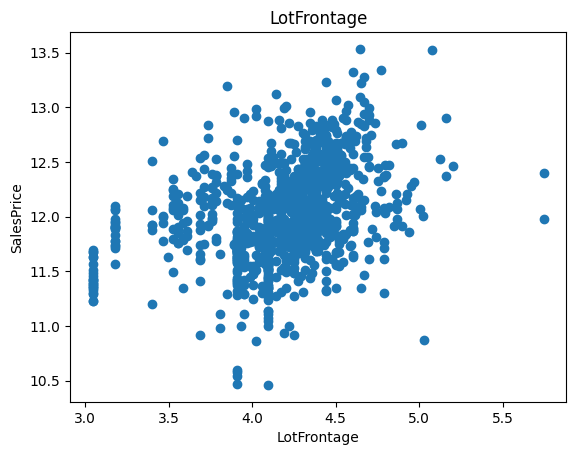

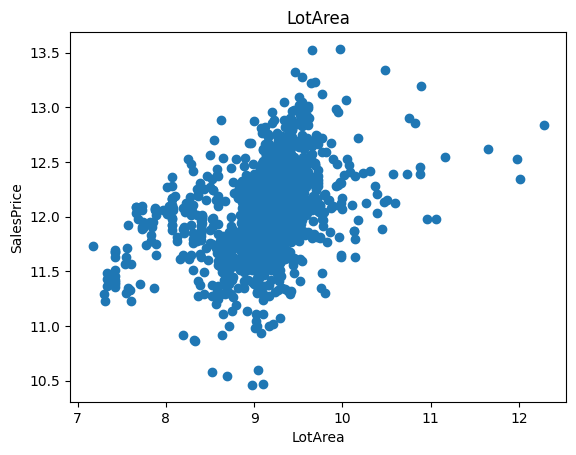

Skipping non-numeric feature 'Neighborhood' in continuous_feature list.


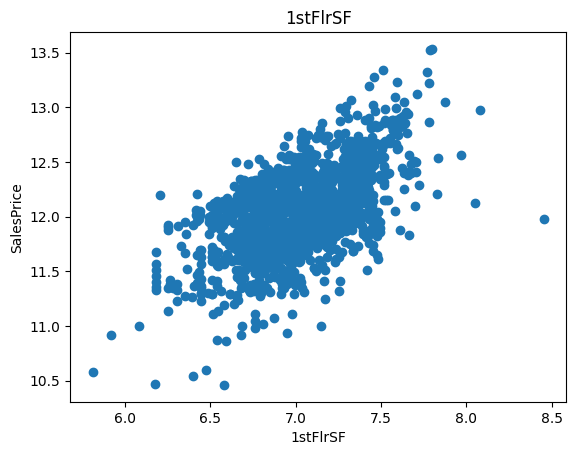

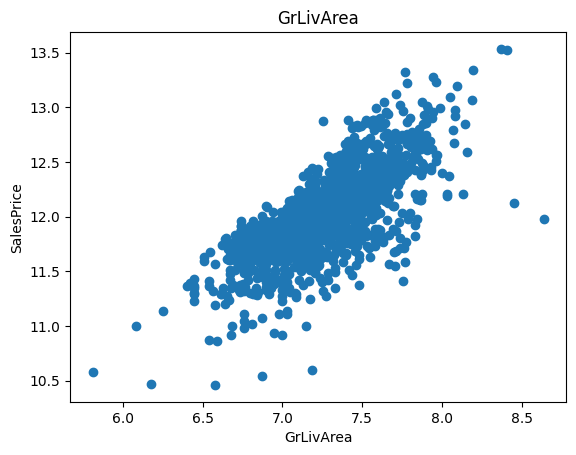

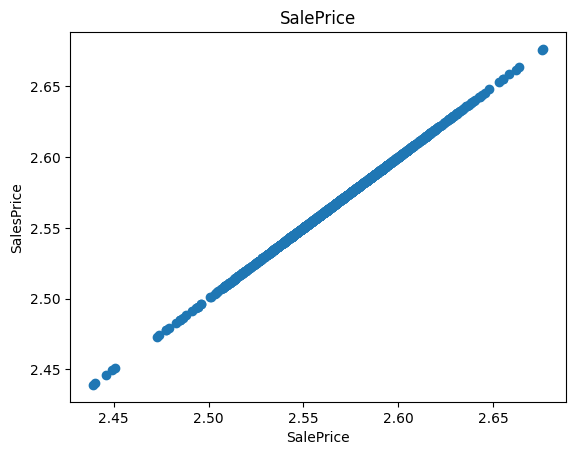

In [19]:
## as from the above hist we can see the data is very skewed
## we will be using logarithmic trainsformation

import pandas as pd # Import pandas for checking dtype

for feature in continuous_feature:
    data=dataset.copy()
    # Ensure the feature is numeric before applying log transformation
    if pd.api.types.is_numeric_dtype(data[feature]):
        if 0 in data[feature].unique():
            pass
        else:
            data[feature]=np.log(data[feature])
            data['SalePrice']=np.log1p(data['SalePrice'])
            plt.scatter(data[feature],data['SalePrice'])
            plt.xlabel(feature)
            plt.ylabel('SalesPrice')
            plt.title(feature)
            plt.show()
    else:
        # Optionally, print a message if a non-numeric feature is skipped
        print(f"Skipping non-numeric feature '{feature}' in continuous_feature list.")

### Outliers


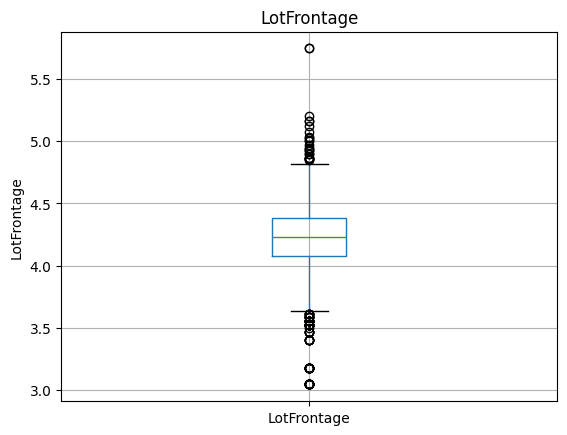

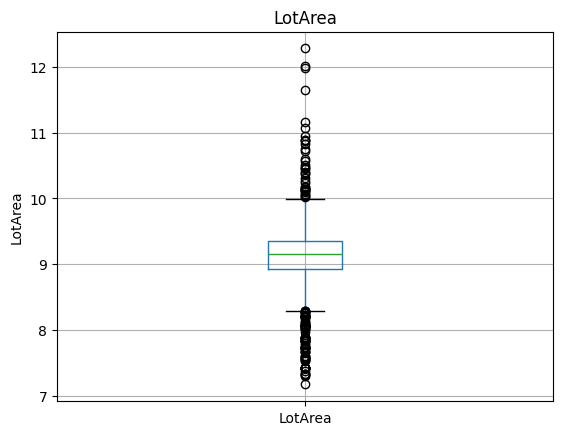

Skipping non-numeric feature 'Neighborhood' for boxplot.


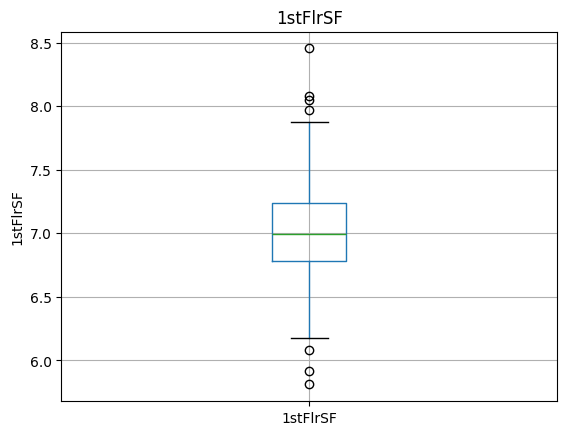

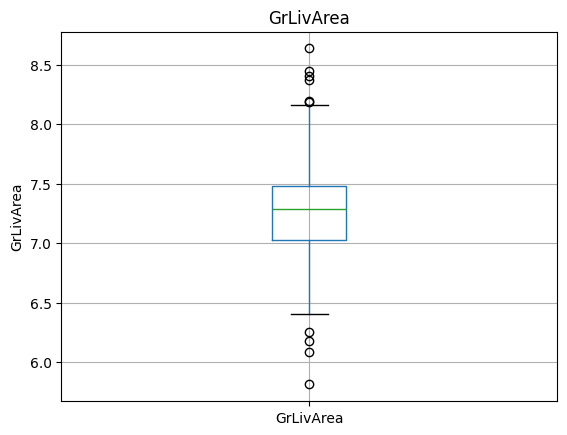

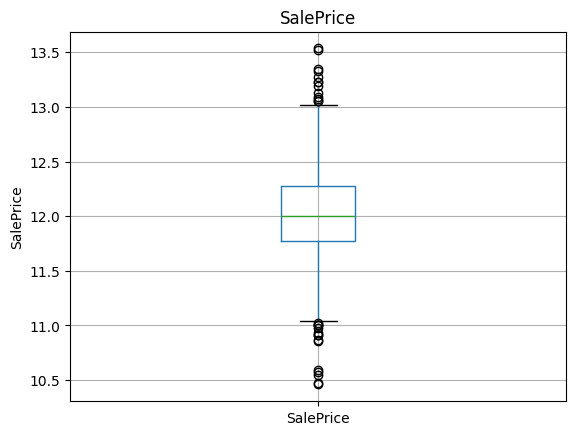

In [20]:
import pandas as pd # Import pandas for checking dtype

for feature in continuous_feature:
    data = dataset.copy()
    # Ensure the feature is numeric before applying log transformation
    if pd.api.types.is_numeric_dtype(data[feature]):
        if 0 in data[feature].unique():
            pass
        else:
            data[feature]= np.log(data[feature])
            data.boxplot(column=feature)
            plt.ylabel(feature)
            plt.title(feature)
            plt.show()
    else:
        # Optionally, print a message if a non-numeric feature is skipped
        print(f"Skipping non-numeric feature '{feature}' for boxplot.")

### Categorical variables

In [21]:
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [22]:
dataset[categorical_features].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0          Y    NaN   NaN         NaN       WD        Normal  
1          Y    NaN   NaN         NaN       WD        Normal  
2          Y    NaN   NaN         NaN       WD        Normal  
3          Y    NaN   NaN         NaN       WD       Abnorml  
4          Y    NaN   NaN         NaN       WD        Normal  

[5 rows x 43 columns]

In [23]:
for feature in categorical_features:
    print ('The feature is {} and the number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is MSZoning and the number of categories are 5
The feature is Street and the number of categories are 2
The feature is Alley and the number of categories are 3
The feature is LotShape and the number of categories are 4
The feature is LandContour and the number of categories are 4
The feature is Utilities and the number of categories are 2
The feature is LotConfig and the number of categories are 5
The feature is LandSlope and the number of categories are 3
The feature is Neighborhood and the number of categories are 25
The feature is Condition1 and the number of categories are 9
The feature is Condition2 and the number of categories are 8
The feature is BldgType and the number of categories are 5
The feature is HouseStyle and the number of categories are 8
The feature is RoofStyle and the number of categories are 6
The feature is RoofMatl and the number of categories are 8
The feature is Exterior1st and the number of categories are 15
The feature is Exterior2nd and the numb

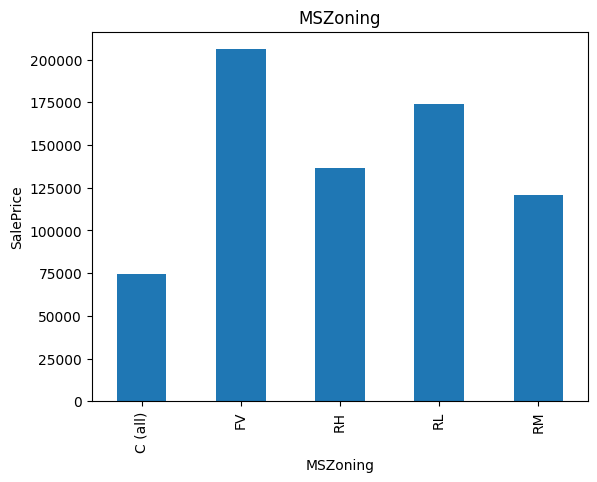

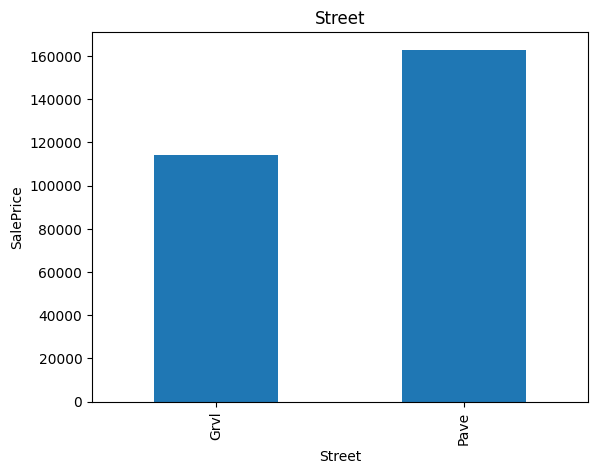

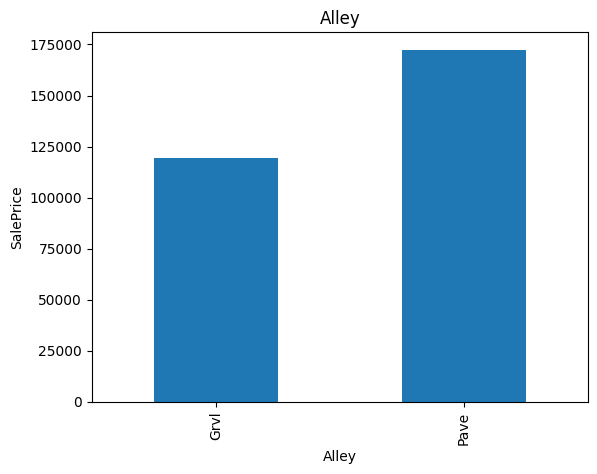

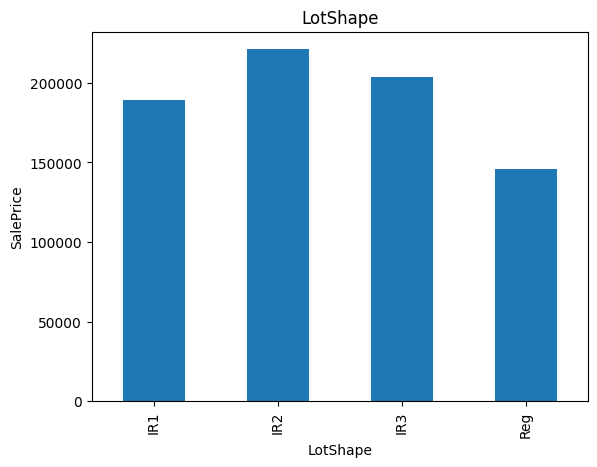

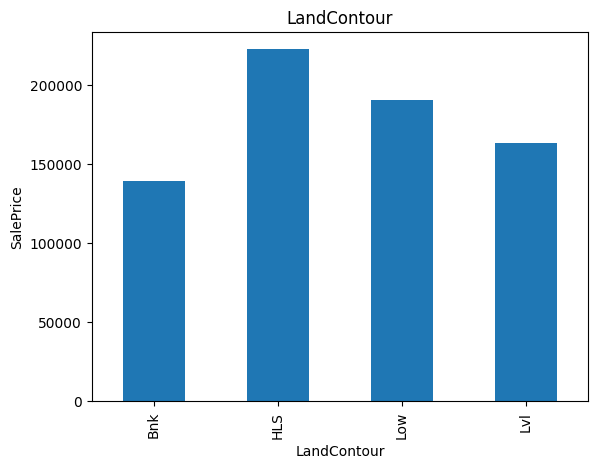

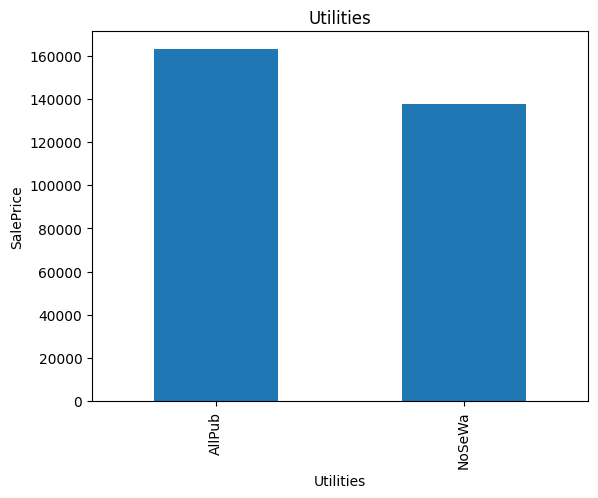

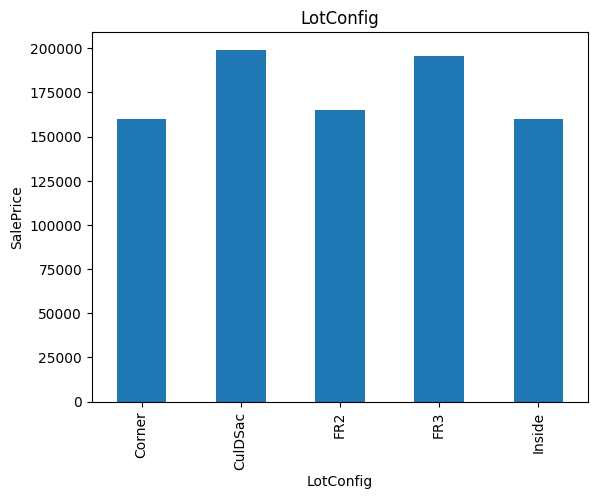

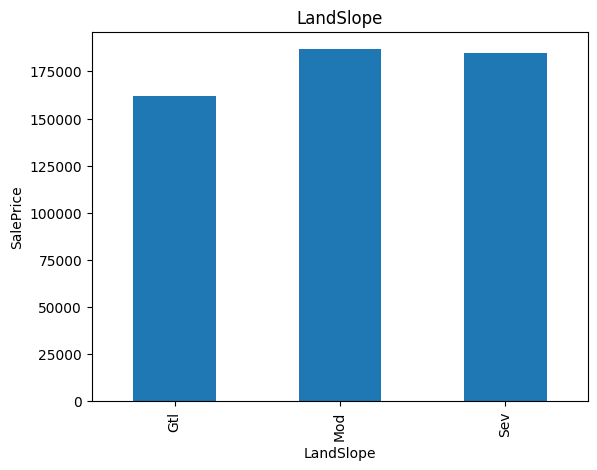

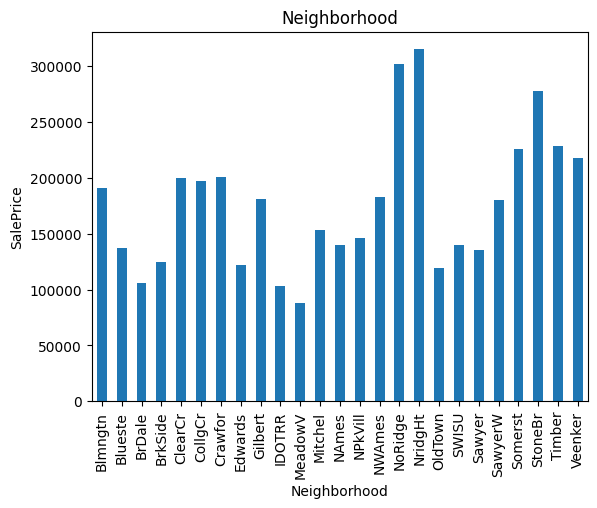

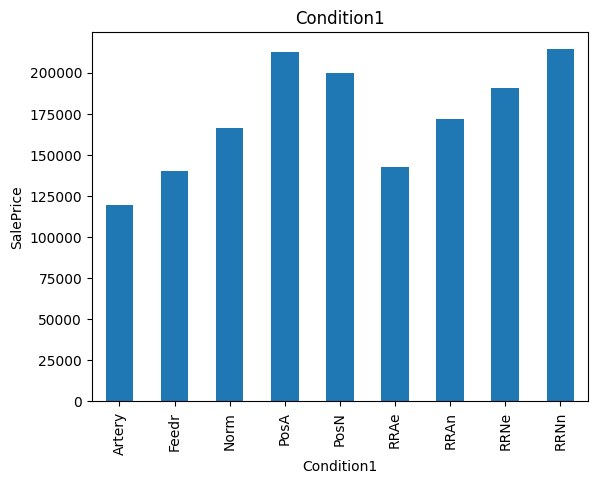

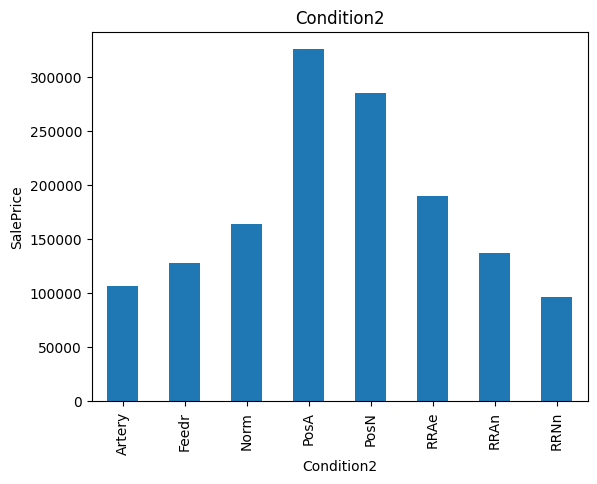

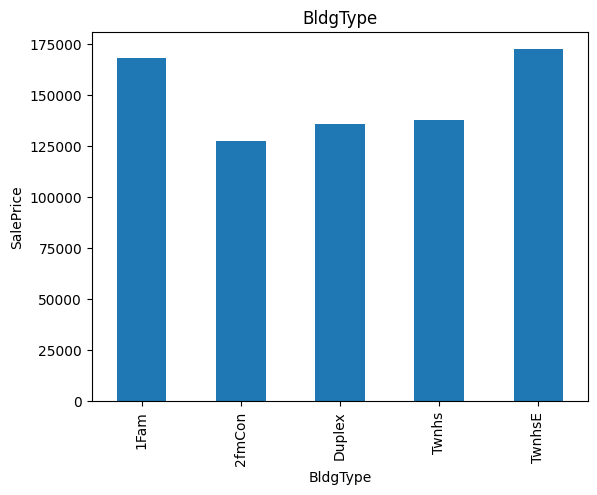

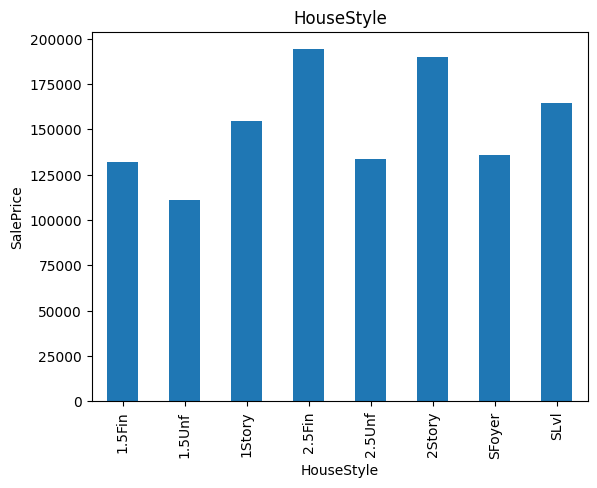

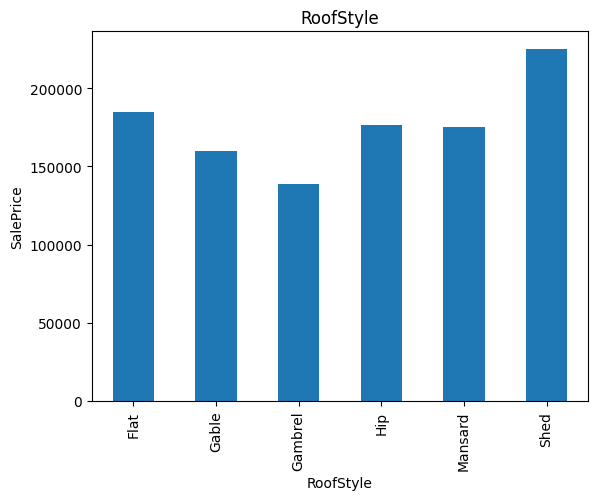

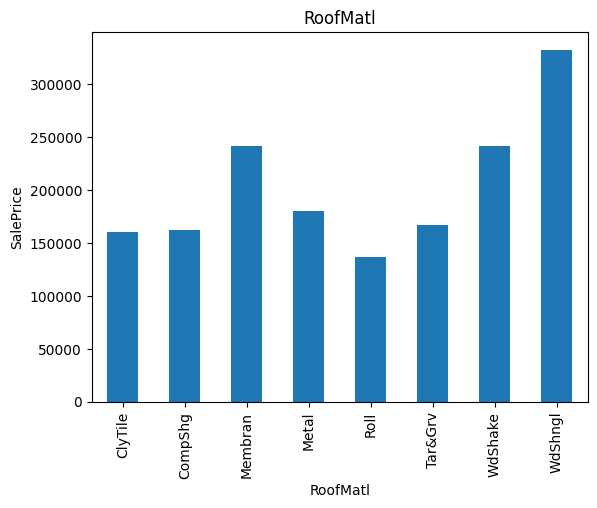

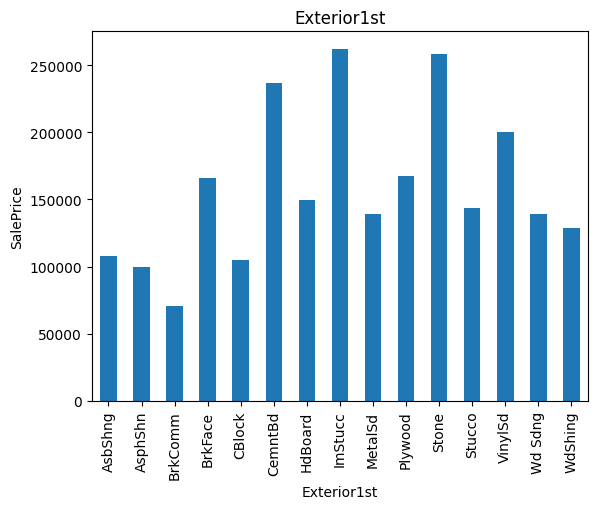

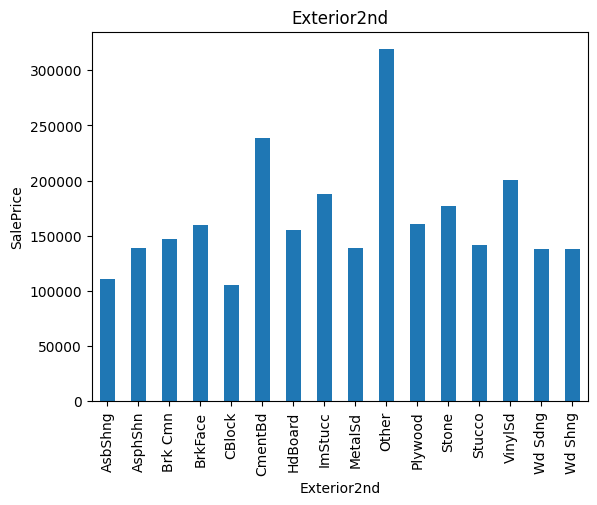

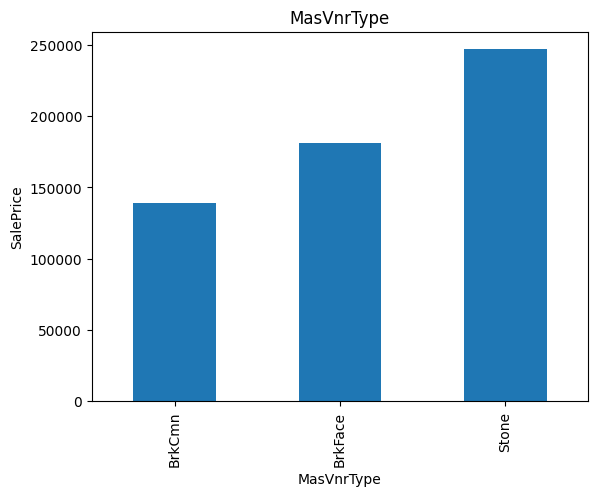

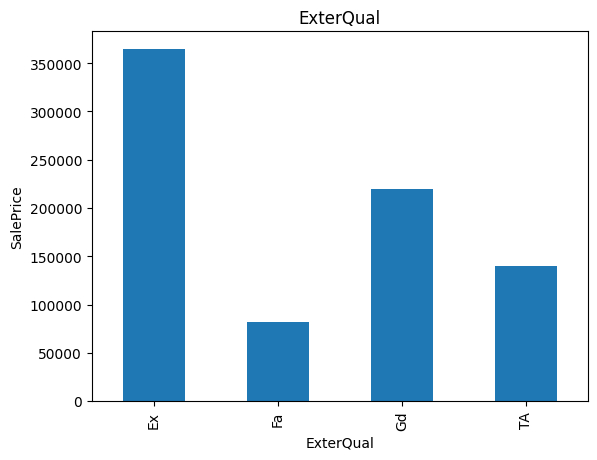

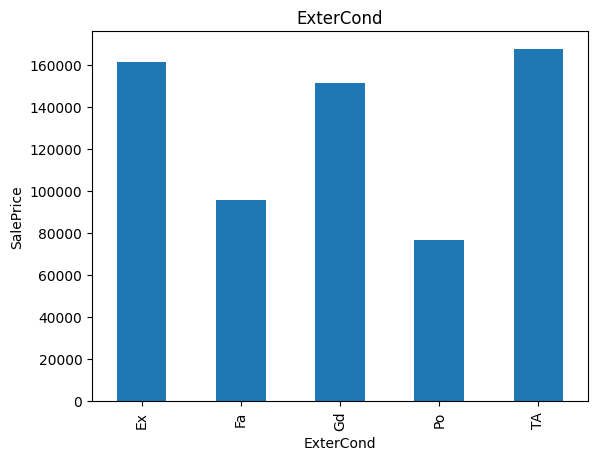

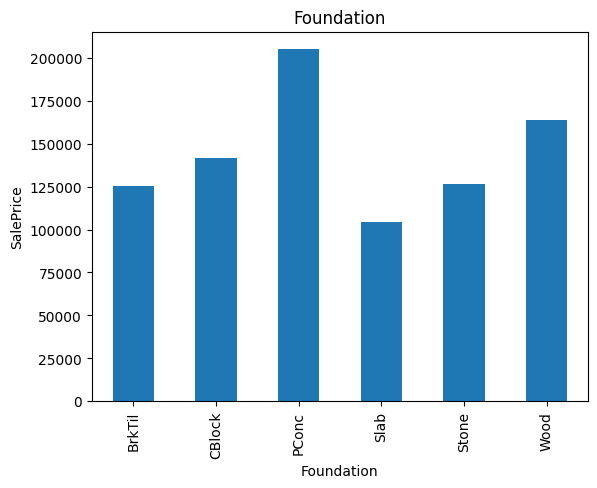

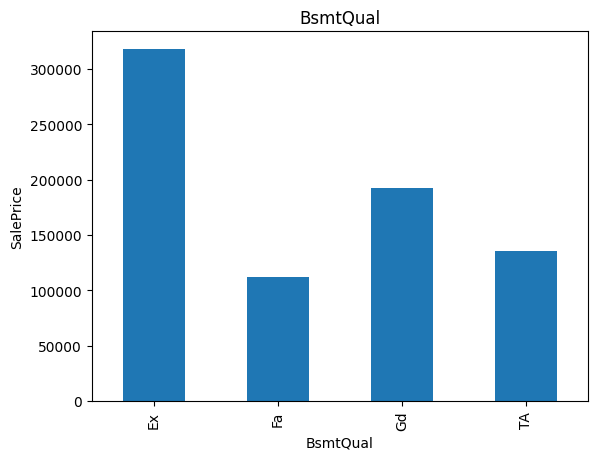

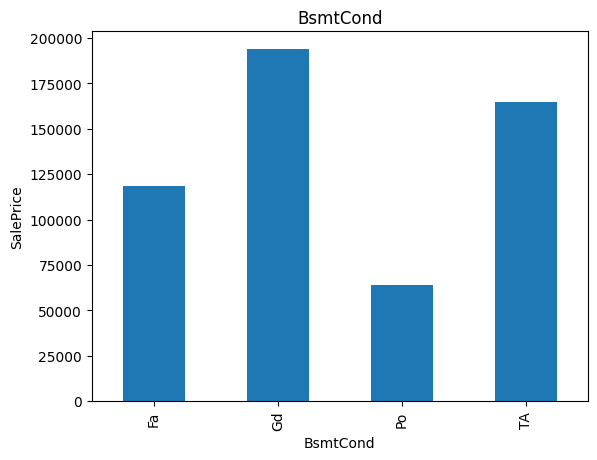

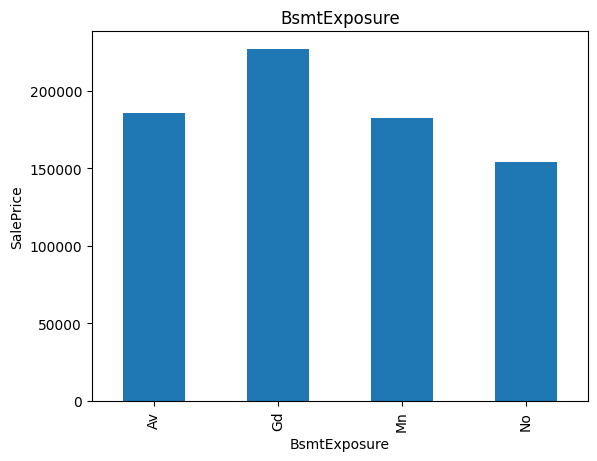

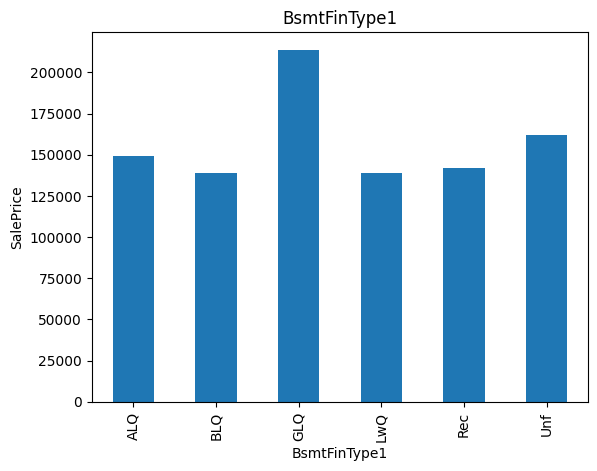

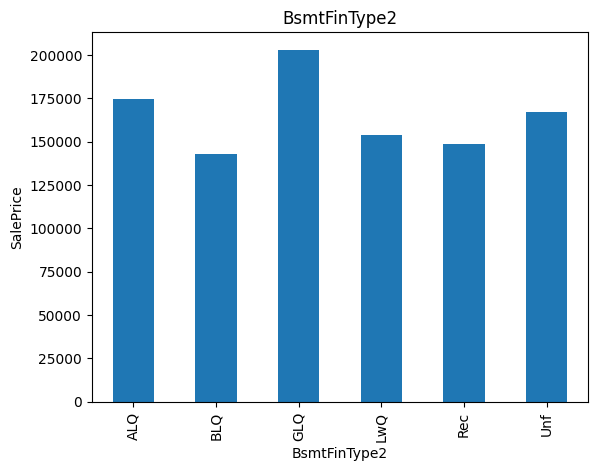

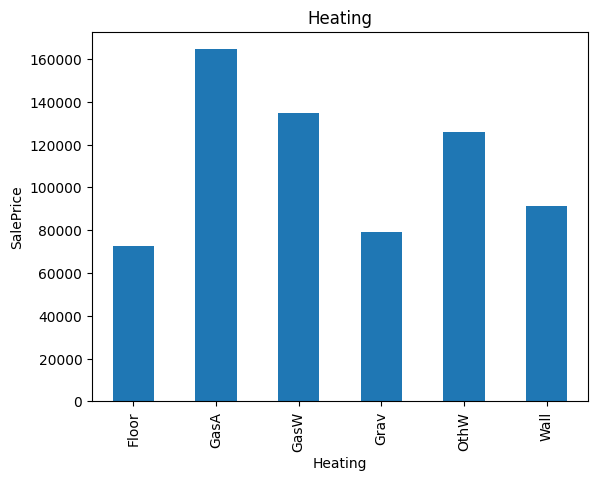

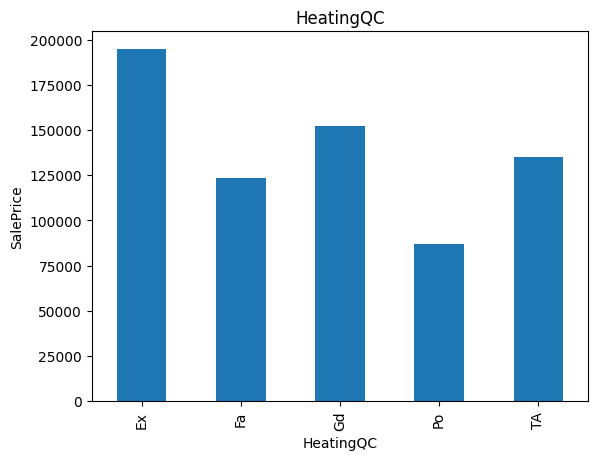

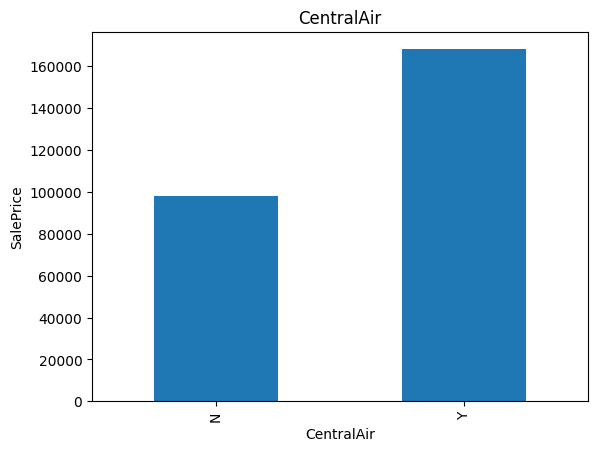

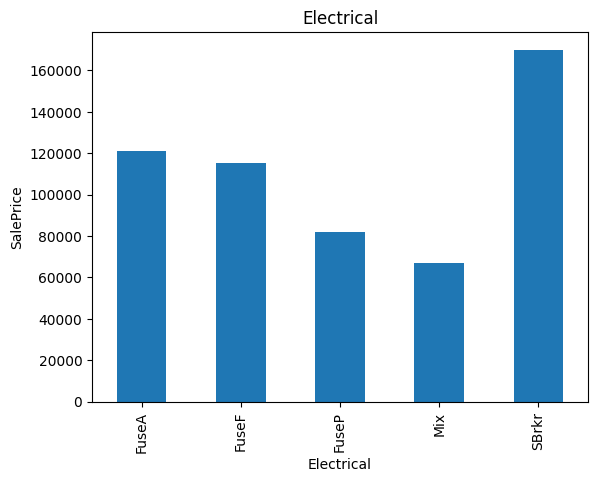

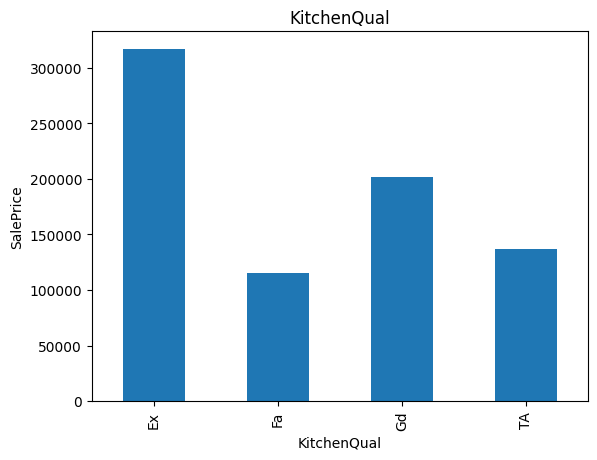

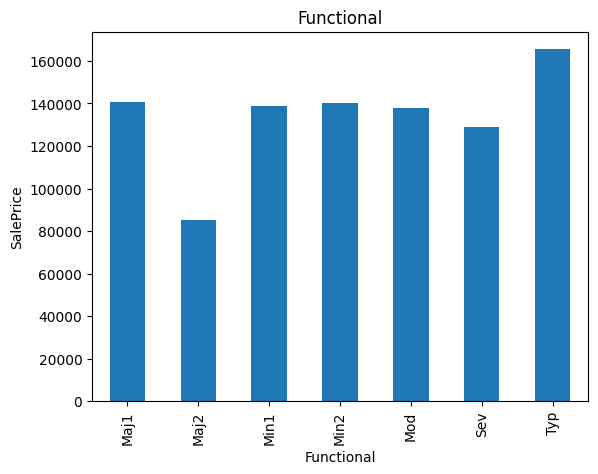

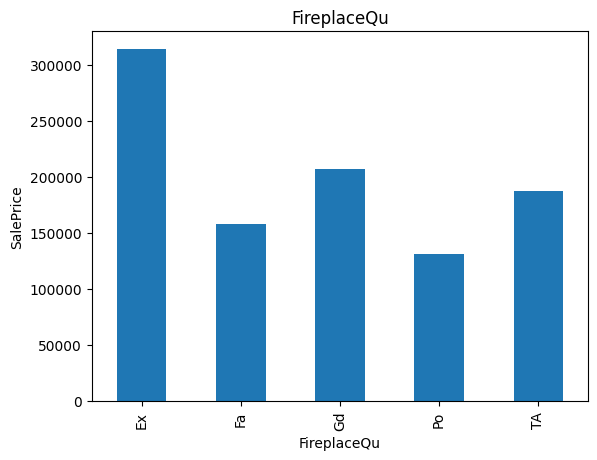

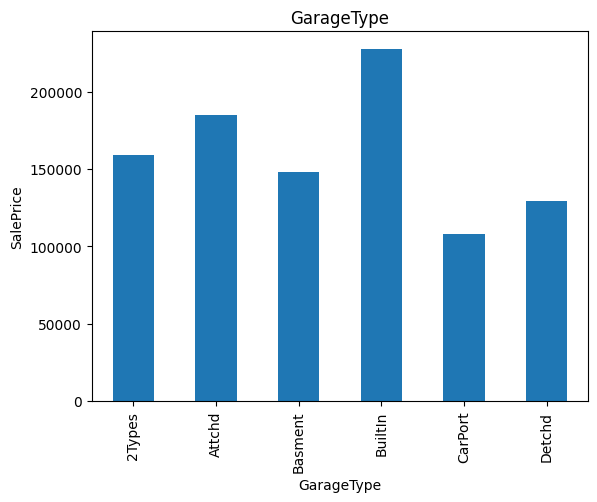

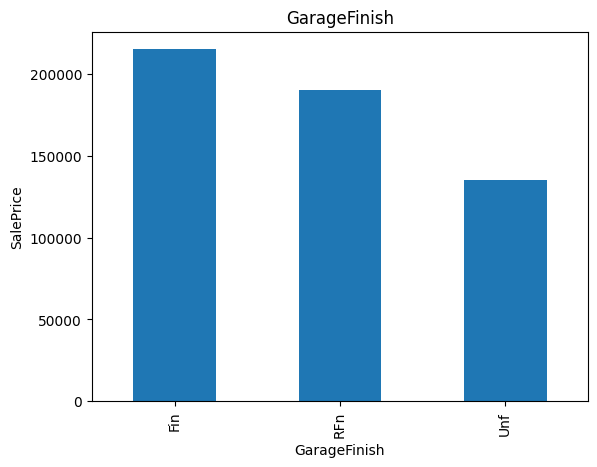

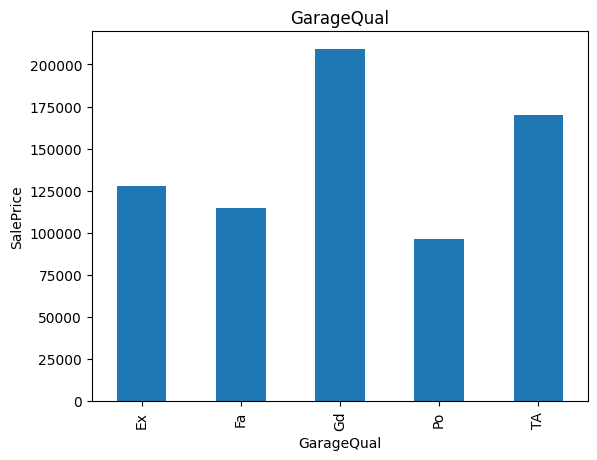

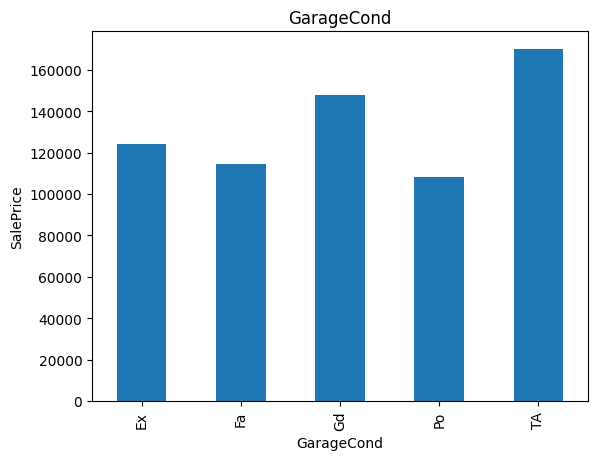

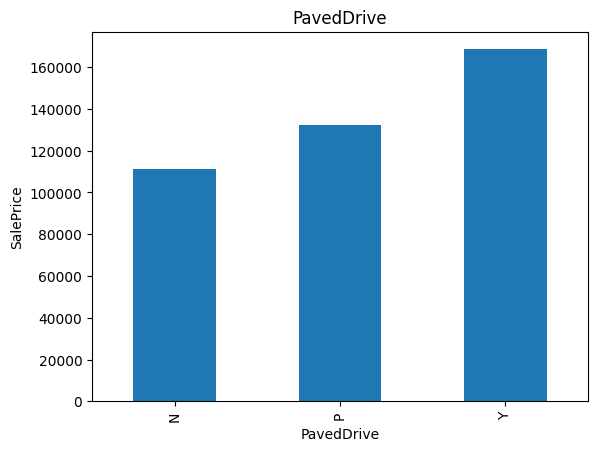

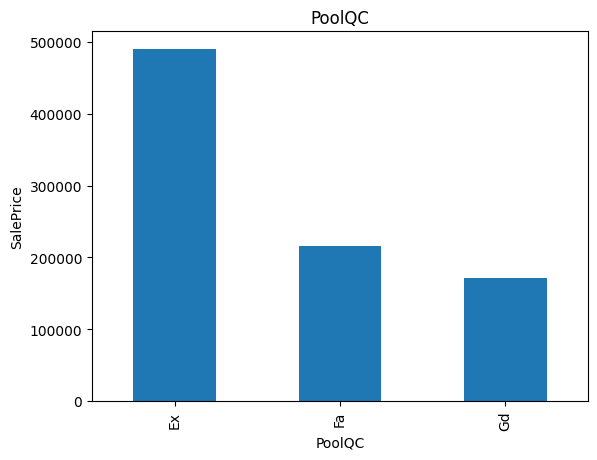

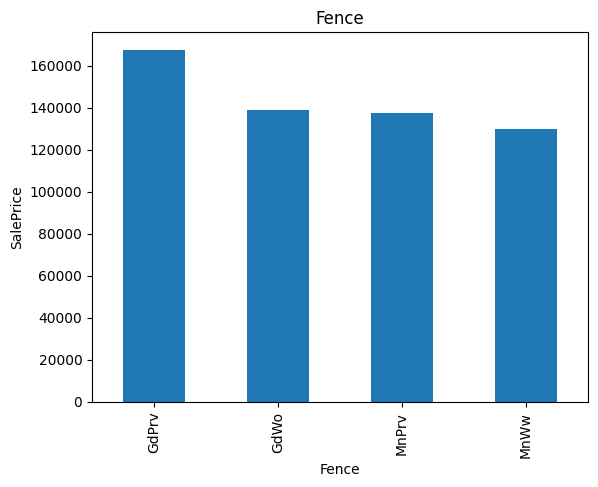

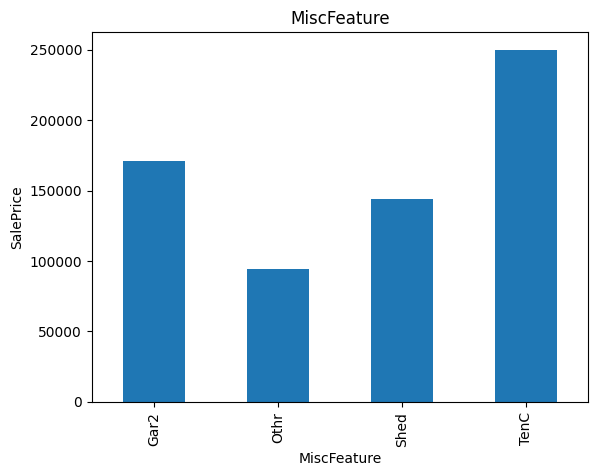

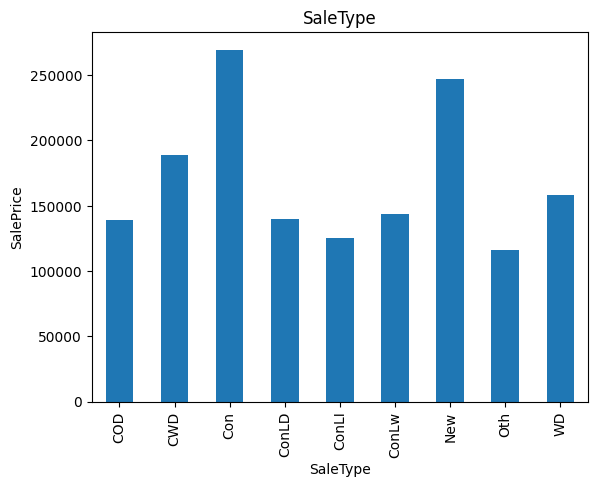

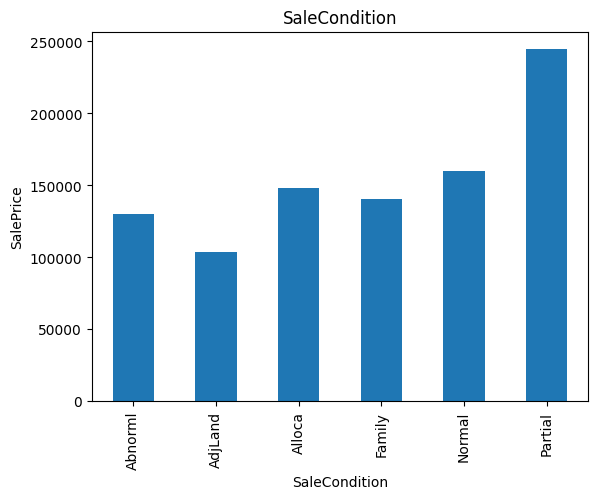

In [24]:
## Find out the relationship betweeen categorical variable and dependent feature like SalesPrice

for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

## Advcanced House Prices : Feature engineering



          1.Missing values
          2.Temporal variables
          3.Categorical variables: remove rare labels
          4.Standarise the values of the variables to the same range


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
## to visualize all the columns in the dataframe

pd.pandas.set_option('display.max_columns',None)

In [29]:
dataset=pd.read_csv('train.csv')
dataset.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [30]:
## there will always be some chance of data leakage so we will need to split the data first then apply feature engineering

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dataset,dataset['SalePrice'],test_size=0.1,random_state=0)
y_test

529     200624
491     133000
459     110000
279     192000
655      88000
         ...  
1452    145000
113     217000
1282    150500
1163    108959
310     165600
Name: SalePrice, Length: 146, dtype: int64

In [31]:
x_train.shape,x_test.shape

((1314, 81), (146, 81))

### Missing values

In [32]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)))

Alley: 0.9377% missing values
MasVnrType: 0.5973% missing values
BsmtQual: 0.0253% missing values
BsmtCond: 0.0253% missing values
BsmtExposure: 0.026% missing values
BsmtFinType1: 0.0253% missing values
BsmtFinType2: 0.026% missing values
FireplaceQu: 0.4726% missing values
GarageType: 0.0555% missing values
GarageFinish: 0.0555% missing values
GarageQual: 0.0555% missing values
GarageCond: 0.0555% missing values
PoolQC: 0.9952% missing values
Fence: 0.8075% missing values
MiscFeature: 0.963% missing values


In [33]:
## Replace missing values with a new label

def replace_cat_feature(dataset,features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

dataset=replace_cat_feature(dataset,features_nan)
data[features_nan].isnull().sum()

Alley           1369
MasVnrType       872
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [34]:
dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  Missing      Reg   
1   2          20       RL         80.0     9600   Pave  Missing      Reg   
2   3          60       RL         68.0    11250   Pave  Missing      IR1   
3   4          70       RL         60.0     9550   Pave  Missing      IR1   
4   5          60       RL         84.0    14260   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd    Missing   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng    Missing   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1      

In [35]:
## numerical features that has missing values

numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!='o']

## we will print the numerical nan vlaues and % of missing values

for feature in numerical_with_nan:
    print( " {}: {} %  missing value".format(feature,np.round(dataset[feature].isnull().mean(),4)))

 LotFrontage: 0.1774 %  missing value
 MasVnrArea: 0.0055 %  missing value
 GarageYrBlt: 0.0555 %  missing value


In [36]:
## replacing the numerical missing values
## replace them by usung median as there are outliers

for feature in numerical_with_nan:
    median_value=dataset[feature].median()
    ## create a new featrue to capture the nan values
    dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    dataset[feature].fillna(median_value,inplace=True)






dataset[numerical_with_nan].isnull().sum()

/tmp/ipython-input-1925687082.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[feature].fillna(median_value,inplace=True)
/tmp/ipython-input-1925687082.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [37]:
dataset.head(50)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0    1          60       RL         65.0     8450   Pave  Missing      Reg   
1    2          20       RL         80.0     9600   Pave  Missing      Reg   
2    3          60       RL         68.0    11250   Pave  Missing      IR1   
3    4          70       RL         60.0     9550   Pave  Missing      IR1   
4    5          60       RL         84.0    14260   Pave  Missing      IR1   
5    6          50       RL         85.0    14115   Pave  Missing      IR1   
6    7          20       RL         75.0    10084   Pave  Missing      Reg   
7    8          60       RL         69.0    10382   Pave  Missing      IR1   
8    9          50       RM         51.0     6120   Pave  Missing      Reg   
9   10         190       RL         50.0     7420   Pave  Missing      Reg   
10  11          20       RL         70.0    11200   Pave  Missing      Reg   
11  12          60       RL         85.0    11924   Pave  Missing      IR1   
12  13          20       RL         69.0    12968   Pave  Missing      IR2   
13  14          20       RL         91.0    10652   Pave  Missing      IR1   
14  15          20       RL         69.0    10920   Pave  Missing      IR1   
15  16          45       RM         51.0     6120   Pave  Missing      Reg   
16  17          20       RL         69.0    11241   Pave  Missing      IR1   
17  18          90       RL         72.0    10791   Pave  Missing      Reg   
18  19          20       RL         66.0    13695   Pave  Missing      Reg   
19  20          20       RL         70.0     7560   Pave  Missing      Reg   
20  21          60       RL        101.0    14215   Pave  Missing      IR1   
21  22          45       RM         57.0     7449   Pave     Grvl      Reg   
22  23          20       RL         75.0     9742   Pave  Missing      Reg   
23  24         120       RM         44.0     4224   Pave  Missing      Reg   
24  25          20       RL         69.0     8246   Pave  Missing      IR1   
25  26          20       RL        110.0    14230   Pave  Missing      Reg   
26  27          20       RL         60.0     7200   Pave  Missing      Reg   
27  28          20       RL         98.0    11478   Pave  Missing      Reg   
28  29          20       RL         47.0    16321   Pave  Missing      IR1   
29  30          30       RM         60.0     6324   Pave  Missing      IR1   
30  31          70  C (all)         50.0     8500   Pave     Pave      Reg   
31  32          20       RL         69.0     8544   Pave  Missing      IR1   
32  33          20       RL         85.0    11049   Pave  Missing      Reg   
33  34          20       RL         70.0    10552   Pave  Missing      IR1   
34  35         120       RL         60.0     7313   Pave  Missing      Reg   
35  36          60       RL        108.0    13418   Pave  Missing      Reg   
36  37          20       RL        112.0    10859   Pave  Missing      Reg   
37  38          20       RL         74.0     8532   Pave  Missing      Reg   
38  39          20       RL         68.0     7922   Pave  Missing      Reg   
39  40          90       RL         65.0     6040   Pave  Missing      Reg   
40  41          20       RL         84.0     8658   Pave  Missing      Reg   
41  42          20       RL        115.0    16905   Pave  Missing      Reg   
42  43          85       RL         69.0     9180   Pave  Missing      IR1   
43  44          20       RL         69.0     9200   Pave  Missing      IR1   
44  45          20       RL         70.0     7945   Pave  Missing      Reg   
45  46         120       RL         61.0     7658   Pave  Missing      Reg   
46  47          50       RL         48.0    12822   Pave  Missing      IR1   
47  48          20       FV         84.0    11096   Pave  Missing      Reg   
48  49         190       RM         33.0     4456   Pave  Missing      Reg   
49  50          20       RL         66.0     7742   Pave  Missing      Reg   

   LandContour Utilities 

In [38]:
## Temporal variables ( Date time variables)
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    dataset[feature]=dataset['YrSold']-dataset[feature]



In [39]:
dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  Missing      Reg   
1   2          20       RL         80.0     9600   Pave  Missing      Reg   
2   3          60       RL         68.0    11250   Pave  Missing      IR1   
3   4          70       RL         60.0     9550   Pave  Missing      IR1   
4   5          60       RL         84.0    14260   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5          5   
1       Norm     1Fam     1Story            6            8         31   
2       Norm     1Fam     2Story            7            5          7   
3       Norm     1Fam     2Story            7            5         91   
4       Norm     1Fam     2Story            8            5          8   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            31     Gable  CompShg     MetalSd     MetalSd    Missing   
2             6     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            36     Gable  CompShg     Wd Sdng     Wd Shng    Missing   
4             8     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1      

In [40]:
dataset[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

YearBuilt  YearRemodAdd  GarageYrBlt
0          5             5          5.0
1         31            31         31.0
2          7             6          7.0
3         91            36          8.0
4          8             8          8.0

### Numerical features
        since numeircal variables are skewed we will perform log normal distribution

In [41]:
dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  Missing      Reg   
1   2          20       RL         80.0     9600   Pave  Missing      Reg   
2   3          60       RL         68.0    11250   Pave  Missing      IR1   
3   4          70       RL         60.0     9550   Pave  Missing      IR1   
4   5          60       RL         84.0    14260   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5          5   
1       Norm     1Fam     1Story            6            8         31   
2       Norm     1Fam     2Story            7            5          7   
3       Norm     1Fam     2Story            7            5         91   
4       Norm     1Fam     2Story            8            5          8   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            31     Gable  CompShg     MetalSd     MetalSd    Missing   
2             6     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            36     Gable  CompShg     Wd Sdng     Wd Shng    Missing   
4             8     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1      

In [42]:
import numpy as np

num_features=['LotFrontage','LotArea','1stFlrSF','GrLivArea','SalePrice']

for feature in num_features:
    dataset[feature]=np.log(dataset[feature])

In [43]:
dataset.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street    Alley LotShape  \
0   1          60       RL     4.174387  9.041922   Pave  Missing      Reg   
1   2          20       RL     4.382027  9.169518   Pave  Missing      Reg   
2   3          60       RL     4.219508  9.328123   Pave  Missing      IR1   
3   4          70       RL     4.094345  9.164296   Pave  Missing      IR1   
4   5          60       RL     4.430817  9.565214   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5          5   
1       Norm     1Fam     1Story            6            8         31   
2       Norm     1Fam     2Story            7            5          7   
3       Norm     1Fam     2Story            7            5         91   
4       Norm     1Fam     2Story            8            5          8   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            31     Gable  CompShg     MetalSd     MetalSd    Missing   
2             6     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            36     Gable  CompShg     Wd Sdng     Wd Shng    Missing   
4             8     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr  6.752270       854             0   
1    GasA        Ex          Y      SBrkr  7.140453         0             0   
2    GasA        Ex          Y      SBrkr  6.824374       866             0   
3    GasA        Gd          Y      SBrkr  6.867974       756             0   
4    GasA        Ex          Y      SBrkr  7.043160      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   7.444249             1             0         2         1             3   
1   7.140453             0             1         2         0             3   
2   7.487734             1             0         2         1             3   
3   7.448334             1             0         1         0             3   
4   7.695303             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1

### Handling rare Categorical faetures
         we will categorical variables that are present less than 1% of the observations

In [44]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']

In [45]:
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [46]:
for feature in categorical_features:
    temp=dataset.groupby(feature)['SalePrice'].count()/len(dataset)
    temp_df=temp[temp>0.1].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')

In [47]:
dataset.head(100)

Id  MSSubClass MSZoning  LotFrontage   LotArea Street    Alley  LotShape  \
0     1          60       RL     4.174387  9.041922   Pave  Missing       Reg   
1     2          20       RL     4.382027  9.169518   Pave  Missing       Reg   
2     3          60       RL     4.219508  9.328123   Pave  Missing       IR1   
3     4          70       RL     4.094345  9.164296   Pave  Missing       IR1   
4     5          60       RL     4.430817  9.565214   Pave  Missing       IR1   
..  ...         ...      ...          ...       ...    ...      ...       ...   
95   96          60       RL     4.234107  9.186560   Pave  Missing  Rare_var   
96   97          20       RL     4.356709  9.236398   Pave  Missing       IR1   
97   98          20       RL     4.290459  9.298443   Pave  Missing       Reg   
98   99          30       RL     4.442651  9.270965   Pave  Missing       Reg   
99  100          20       RL     4.343805  9.139918   Pave  Missing       IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1          Lvl    AllPub  Rare_var       Gtl     Rare_var   Rare_var   
2          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3          Lvl    AllPub    Corner       Gtl     Rare_var       Norm   
4          Lvl    AllPub  Rare_var       Gtl     Rare_var       Norm   
..         ...       ...       ...       ...          ...        ...   
95         Lvl    AllPub    Corner       Gtl     Rare_var       Norm   
96         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
97    Rare_var    AllPub    Inside       Gtl     Rare_var       Norm   
98         Lvl    AllPub    Corner       Gtl     Rare_var       Norm   
99         Lvl    AllPub    Inside       Gtl        NAmes       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0        Norm     1Fam     2Story            7            5          5   
1        Norm     1Fam     1Story            6            8         31   
2        Norm     1Fam     2Story            7            5          7   
3        Norm     1Fam     2Story            7            5         91   
4        Norm     1Fam     2Story            8            5          8   
..        ...      ...        ...          ...          ...        ...   
95       Norm     1Fam     2Story            6            8         16   
96       Norm     1Fam     1Story            7            5          7   
97       Norm     1Fam     1Story            4            5         42   
98       Norm     1Fam     1Story            5            5         90   
99       Norm     1Fam     1Story            4            5         51   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0              5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             31     Gable  CompShg     MetalSd     MetalSd    Missing   
2              6     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             36     Gable  CompShg     Wd Sdng    Rare_var    Missing   
4              8     Gable  CompShg     VinylSd     VinylSd    BrkFace   
..           ...       ...      ...         ...         ...        ...   
95            16     Gable  CompShg     VinylSd     VinylSd    BrkFace   
96             7     Gable  CompShg     VinylSd     VinylSd    BrkFace   
97            42       Hip  CompShg     HdBoard     HdBoard    BrkFace   
98            60     Gable  CompShg     Wd Sdng     Wd Sdng    Missing   
99            51     Gable  CompShg    Rare_var    Rare_var    Missing   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual  BsmtCond BsmtExposure  \
0        196.0        Gd        TA      PConc       Gd        TA           No   
1          0.0        TA        TA     CBlock       Gd        TA     Rare_var   
2        162.0        Gd        TA      PConc       Gd        TA     Rare_var   
3          0.0        TA        TA   Rare_var       TA  Rare_var 

In [48]:
for feature in categorical_features:
    labels_ordered=dataset.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

In [49]:
dataset.head(10)

Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0   1          60         2     4.174387  9.041922       1      1         0   
1   2          20         2     4.382027  9.169518       1      1         0   
2   3          60         2     4.219508  9.328123       1      1         1   
3   4          70         2     4.094345  9.164296       1      1         1   
4   5          60         2     4.430817  9.565214       1      1         1   
5   6          50         2     4.442651  9.554993       1      1         1   
6   7          20         2     4.317488  9.218705       1      1         0   
7   8          60         2     4.234107  9.247829       1      1         1   
8   9          50         0     3.931826  8.719317       1      1         0   
9  10         190         2     3.912023  8.911934       1      1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            0          1          0          0             2           1   
1            0          1          2          0             1           0   
2            0          1          0          0             2           1   
3            0          1          1          0             1           1   
4            0          1          2          0             1           1   
5            0          1          0          0             1           1   
6            0          1          0          0             1           1   
7            0          1          1          0             1           0   
8            0          1          0          0             1           0   
9            0          1          1          0             1           0   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           1         1           3            7            5          5   
1           1         1           2            6            8         31   
2           1         1           3            7            5          7   
3           1         1           3            7            5         91   
4           1         1           3            8            5          8   
5           1         1           0            5            5         16   
6           1         1           2            8            5          3   
7           1         1           3            7            6         36   
8           1         1           0            7            5         77   
9           0         0           1            5            6         69   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0             5          0         0            4            4           1   
1            31          0         0            1            1           0   
2             6          0         0            4            4           1   
3            36          0         0            0            3           0   
4             8          0         0            4            4           1   
5            14          0         0            4            4           0   
6             2          0         0            4            4           2   
7            36          0         0            2            2           2   
8            58          0         0            3            3           0   
9            58          0         0            1            1           0   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          1          1           2         1         1   
1         0.0          0          1           1         1         1   
2       162.0          1          1           2         1         1   
3         0.0          0          1           0         0         0   
4       350.0          1          1           2         1         1   
5         0.0          0          1           0         1         1   
6       186.0          1          1           2         2         1   
7       240.0        

In [50]:
scaling_feature=[feature for feature in dataset.columns if feature not in ['Id','SalePrice']]
len(scaling_feature)

82

In [51]:
scaling_feature

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

### Scaling Feature


In [52]:
feature_scale=[feature for feature in dataset.columns if feature not in ['Id','SalePrice']]



In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])


MinMaxScaler()

In [54]:
scaler.transform(dataset[feature_scale])

array([[0.23529412, 1.        , 0.41820812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.49506375, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 1.        , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 1.        , 0.42385922, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.47117546, ..., 0.        , 0.        ,
        0.        ]])

In [55]:
data=pd.concat([dataset[['Id','SalePrice']].reset_index(drop=True),
                  pd.DataFrame(scaler.transform(dataset[feature_scale]),columns=feature_scale)],axis=1)

In [56]:
data.head()

Id  SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
0   1  12.247694    0.235294       1.0     0.418208  0.366344     1.0    1.0   
1   2  12.109011    0.000000       1.0     0.495064  0.391317     1.0    1.0   
2   3  12.317167    0.235294       1.0     0.434909  0.422359     1.0    1.0   
3   4  11.849398    0.294118       1.0     0.388581  0.390295     1.0    1.0   
4   5  12.429216    0.235294       1.0     0.513123  0.468761     1.0    1.0   

   LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
0       0.0          0.0        1.0        0.0        0.0           1.0   
1       0.0          0.0        1.0        1.0        0.0           0.5   
2       0.5          0.0        1.0        0.0        0.0           1.0   
3       0.5          0.0        1.0        0.5        0.0           0.5   
4       0.5          0.0        1.0        1.0        0.0           0.5   

   Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  \
0         1.0         1.0       1.0    1.000000     0.666667        0.500   
1         0.0         1.0       1.0    0.666667     0.555556        0.875   
2         1.0         1.0       1.0    1.000000     0.666667        0.500   
3         1.0         1.0       1.0    1.000000     0.666667        0.500   
4         1.0         1.0       1.0    1.000000     0.777778        0.500   

   YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
0   0.036765      0.098361        0.0       0.0         1.00         1.00   
1   0.227941      0.524590        0.0       0.0         0.25         0.25   
2   0.051471      0.114754        0.0       0.0         1.00         1.00   
3   0.669118      0.606557        0.0       0.0         0.00         0.75   
4   0.058824      0.147541        0.0       0.0         1.00         1.00   

   MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0         0.5     0.12250        0.5        1.0         1.0       0.5   
1         0.0     0.00000        0.0        1.0         0.5       0.5   
2         0.5     0.10125        0.5        1.0         1.0       0.5   
3         0.0     0.00000        0.0        1.0         0.0       0.0   
4         0.5     0.21875        0.5        1.0         1.0       0.5   

   BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0       1.0           0.0           1.0    0.125089           1.0         0.0   
1       1.0           0.5           0.5    0.173281           1.0         0.0   
2       1.0           0.5           1.0    0.086109           1.0         0.0   
3       0.0           0.0           0.5    0.038271           1.0         0.0   
4       1.0           1.0           1.0    0.116052           1.0         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0   0.064212     0.140098      1.0   1.000000         1.0         1.0   
1   0.121575     0.206547      1.0   1.000000         1.0         1.0   
2   0.185788     0.150573      1.0   1.000000         1.0         1.0   
3   0.231164     0.123732      1.0   0.666667         1.0         1.0   
4   0.209760     0.187398      1.0   1.000000         1.0         1.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  0.356155  0.413559           0.0   0.577712      0.333333           0.0   
1  0.503056  0.000000           0.0   0.470245      0.000000           0.5   
2  0.383441  0.419370           0.0   0.593095      0.333333           0.0   
3  0.399941  0.366102           0.0   0.579157      0.333333           0.0   
4  0.466237  0.509927           0.0   0.666523      0.333333           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0  0.666667       0.5         0.375      0.333333          0.5      0.500000   
1  0.666667       0.0         0.375      0.333333          0.0      0.333333   
2  0.666667       0.5         0.375      0.333333          0.5      0.3

In [57]:
data.to_csv('x_train.csv',index=False)

## Feature Selection

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## for feature selection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

## to visualize all columns in the dataframe

pd.pandas.set_option('display.max_columns',None)

In [59]:
dataset=pd.read_csv('x_train.csv')

In [60]:
dataset.head()

Id  SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
0   1  12.247694    0.235294       1.0     0.418208  0.366344     1.0    1.0   
1   2  12.109011    0.000000       1.0     0.495064  0.391317     1.0    1.0   
2   3  12.317167    0.235294       1.0     0.434909  0.422359     1.0    1.0   
3   4  11.849398    0.294118       1.0     0.388581  0.390295     1.0    1.0   
4   5  12.429216    0.235294       1.0     0.513123  0.468761     1.0    1.0   

   LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
0       0.0          0.0        1.0        0.0        0.0           1.0   
1       0.0          0.0        1.0        1.0        0.0           0.5   
2       0.5          0.0        1.0        0.0        0.0           1.0   
3       0.5          0.0        1.0        0.5        0.0           0.5   
4       0.5          0.0        1.0        1.0        0.0           0.5   

   Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  \
0         1.0         1.0       1.0    1.000000     0.666667        0.500   
1         0.0         1.0       1.0    0.666667     0.555556        0.875   
2         1.0         1.0       1.0    1.000000     0.666667        0.500   
3         1.0         1.0       1.0    1.000000     0.666667        0.500   
4         1.0         1.0       1.0    1.000000     0.777778        0.500   

   YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
0   0.036765      0.098361        0.0       0.0         1.00         1.00   
1   0.227941      0.524590        0.0       0.0         0.25         0.25   
2   0.051471      0.114754        0.0       0.0         1.00         1.00   
3   0.669118      0.606557        0.0       0.0         0.00         0.75   
4   0.058824      0.147541        0.0       0.0         1.00         1.00   

   MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0         0.5     0.12250        0.5        1.0         1.0       0.5   
1         0.0     0.00000        0.0        1.0         0.5       0.5   
2         0.5     0.10125        0.5        1.0         1.0       0.5   
3         0.0     0.00000        0.0        1.0         0.0       0.0   
4         0.5     0.21875        0.5        1.0         1.0       0.5   

   BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0       1.0           0.0           1.0    0.125089           1.0         0.0   
1       1.0           0.5           0.5    0.173281           1.0         0.0   
2       1.0           0.5           1.0    0.086109           1.0         0.0   
3       0.0           0.0           0.5    0.038271           1.0         0.0   
4       1.0           1.0           1.0    0.116052           1.0         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0   0.064212     0.140098      1.0   1.000000         1.0         1.0   
1   0.121575     0.206547      1.0   1.000000         1.0         1.0   
2   0.185788     0.150573      1.0   1.000000         1.0         1.0   
3   0.231164     0.123732      1.0   0.666667         1.0         1.0   
4   0.209760     0.187398      1.0   1.000000         1.0         1.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  0.356155  0.413559           0.0   0.577712      0.333333           0.0   
1  0.503056  0.000000           0.0   0.470245      0.000000           0.5   
2  0.383441  0.419370           0.0   0.593095      0.333333           0.0   
3  0.399941  0.366102           0.0   0.579157      0.333333           0.0   
4  0.466237  0.509927           0.0   0.666523      0.333333           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0  0.666667       0.5         0.375      0.333333          0.5      0.500000   
1  0.666667       0.0         0.375      0.333333          0.0      0.333333   
2  0.666667       0.5         0.375      0.333333          0.5      0.3

In [61]:
# capture the dependent feature
y_train=dataset[['SalePrice']]

In [62]:
## drop the dependent feature form the dataset

x_train=dataset.drop(['Id','SalePrice'],axis=1)

In [63]:
print (x_train.isnull().sum())

MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
                 ..
SaleType          0
SaleCondition     0
LotFrontagenan    0
MasVnrAreanan     0
GarageYrBltnan    0
Length: 82, dtype: int64


In [64]:
from sklearn.impute import SimpleImputer

In [65]:
Imputer = SimpleImputer(strategy='mean')  # Replace 'mean' with 'median' or 'most_frequent' if needed
x_train=Imputer.fit_transform(x_train) # Apply imputation

In [66]:
###  Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005,random_state=0)) ## to set the seed , the random state in tis function

feature_sel_model.fit(x_train,y_train)


SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [67]:
feature_sel_model.get_support()

array([False,  True, False, False, False, False,  True, False, False,
       False, False, False,  True, False,  True, False,  True, False,
       False,  True,  True, False, False, False,  True, False,  True,
       False,  True,  True,  True,  True, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True, False,  True, False, False, False,  True, False,
        True,  True,  True,  True, False,  True,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [78]:
x_train=pd.DataFrame(x_train, columns=feature_scale)

In [79]:
# lets print the total and no. of selected features
# make a list of selected features

# Convert x_train back to DataFrame for column operations
x_train_df = pd.DataFrame(x_train, columns=feature_scale)
selected_feat= x_train_df.columns[(feature_sel_model.get_support())]

# let's print some stats

print('total features : {}'. format((x_train_df.shape[1])))
print('selected features : {}'.format(len(selected_feat)))
print("features with coefficients shrank to zero : {}".format (np.sum(feature_sel_model.estimator_.coef_== 0)))

total features : 82
selected features : 28
features with coefficients shrank to zero : 54


In [73]:
# let's print the number of total and selected features

# First, convert x_train back to a DataFrame to access column names
# We use 'feature_scale' which contains the original column names
x_train_df = pd.DataFrame(x_train, columns=feature_scale)

# this is how we can make a list of the selected features
selected_feat = x_train_df.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((x_train_df.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 82
selected features: 28
features with coefficients shrank to zero: 54


In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Perform the train-test split using the feature-selected data
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(x_train_df[selected_feat], y_train, test_size=0.2, random_state=0)

RF=RandomForestRegressor()
model = RF.fit(X_train_final, y_train_final.values.ravel())